<a href="https://colab.research.google.com/github/chikara-n-ellipse/reconst3d/blob/main/imsup3d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import shutil
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as tfs
import os
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# %matplotlib notebook

In [2]:
extract_dir = "/content/img_cropped_celeba"
shutil.unpack_archive(
    "/content/drive/MyDrive/Projects/celebA/img_cropped_celeba.zip", 
    extract_dir=extract_dir,
    )
data_dir = "/content/img_cropped_celeba/"

In [ ]:
# !ls /content/img_cropped_celeba/val

In [6]:
# Setup
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

In [55]:
class Generator(nn.Module):
  """
    Vanilla GAN Generator
  """
  def __init__(self,):
    super().__init__()

    # First upsampling
    self.ct0_0 = nn.ConvTranspose2d(64, 48, 3)
    self.ct0_1 = nn.ConvTranspose2d(48, 32, 3)
    self.lrelu0 = nn.LeakyReLU(0.25)

    # Second upsampling
    self.upsample1 = nn.Upsample((8, 8))
    self.c1_0 = nn.Conv2d(32, 24, 3)
    self.c1_1 = nn.Conv2d(24, 16, 3)
    self.lrelu1 = nn.LeakyReLU(0.25)

    # Third upsampling
    self.upsample2 = nn.Upsample((16, 16))
    self.c2_0 = nn.Conv2d(16, 8, 3, padding='same')
    self.c2_1 = nn.Conv2d(8, 3, 3, padding='same')
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):

    x = self.ct0_0(x)
    x = self.ct0_1(x)
    x =  self.lrelu0(x)

    x = self.upsample1(x)
    x = self.c1_0(x)
    x = self.c1_1(x)
    x =  self.lrelu1(x)

    x = self.upsample2(x)
    x = self.c2_0(x)
    x = self.c2_1(x)
    x = self.sigmoid(x)

    return x


class Discriminator(nn.Module):
  """
    Vanilla GAN Discriminator
  """
  def __init__(self):
    super().__init__()
    
    # First downsampling
    self.c0_0 = nn.Conv2d(3, 8, 3)
    self.c0_1 = nn.Conv2d(8, 16, 3)
    self.lrelu0 = nn.LeakyReLU(0.25)
    self.downsample0 = nn.Upsample((8, 8))

    # Second downsampling
    self.c1_0 = nn.Conv2d(16, 24, 3)
    self.c1_1 = nn.Conv2d(24, 32, 3)
    self.lrelu1 = nn.LeakyReLU(0.25)
    self.downsample1 = nn.Upsample((6, 6))

    # Third downsampling
    self.c2_0 = nn.Conv2d(32, 48, 4)
    self.c2_1 = nn.Conv2d(48, 64, 3)
    self.linear = nn.Linear(64, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.c0_0(x)
    x = self.c0_1(x)
    x = self.lrelu0(x)
    x =  self.downsample0(x)

    x = self.c1_0(x)
    x = self.c1_1(x)
    x = self.lrelu1(x)
    x =  self.downsample1(x)

    x = self.c2_0(x)
    x = self.c2_1(x)
    x = self.linear(x.squeeze())
    x = self.sigmoid(x)
    return x

epoch: 00000
p_fake:0.517, p_real:0.517
torch.Size([512, 3, 16, 16])


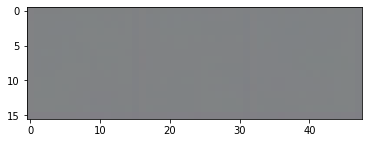

epoch: 00001
p_fake:0.545, p_real:0.369
torch.Size([512, 3, 16, 16])


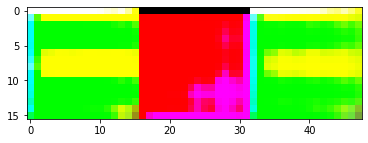

epoch: 00002
p_fake:0.703, p_real:0.749
torch.Size([512, 3, 16, 16])


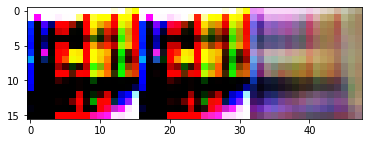

epoch: 00003
p_fake:0.530, p_real:0.494
torch.Size([512, 3, 16, 16])


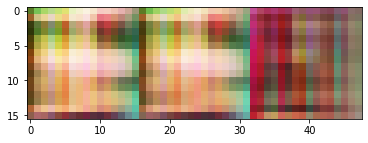

epoch: 00004
p_fake:0.518, p_real:0.503
torch.Size([512, 3, 16, 16])


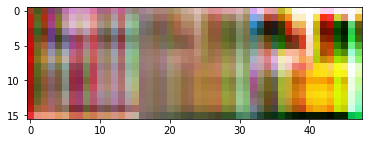

epoch: 00005
p_fake:0.508, p_real:0.502
torch.Size([512, 3, 16, 16])


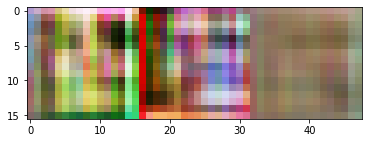

epoch: 00006
p_fake:0.503, p_real:0.499
torch.Size([512, 3, 16, 16])


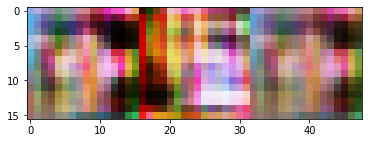

epoch: 00007
p_fake:0.491, p_real:0.493
torch.Size([512, 3, 16, 16])


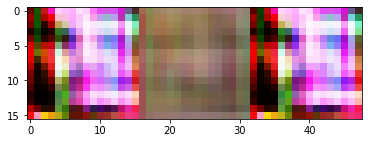

epoch: 00008
p_fake:0.510, p_real:0.504
torch.Size([512, 3, 16, 16])


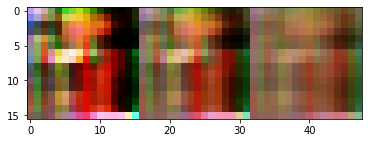

epoch: 00009
p_fake:0.495, p_real:0.493
torch.Size([512, 3, 16, 16])


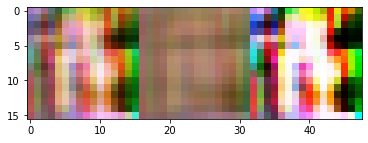

epoch: 00010
p_fake:0.501, p_real:0.498
torch.Size([512, 3, 16, 16])


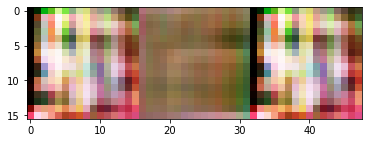

epoch: 00011
p_fake:0.501, p_real:0.502
torch.Size([512, 3, 16, 16])


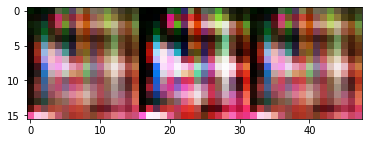

epoch: 00012
p_fake:0.496, p_real:0.488
torch.Size([512, 3, 16, 16])


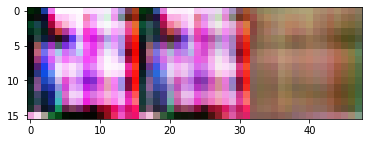

epoch: 00013
p_fake:0.504, p_real:0.499
torch.Size([512, 3, 16, 16])


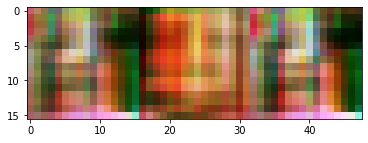

epoch: 00014
p_fake:0.508, p_real:0.506
torch.Size([512, 3, 16, 16])


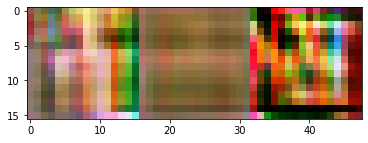

epoch: 00015
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


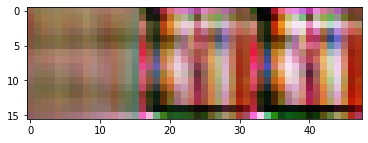

epoch: 00016
p_fake:0.510, p_real:0.509
torch.Size([512, 3, 16, 16])


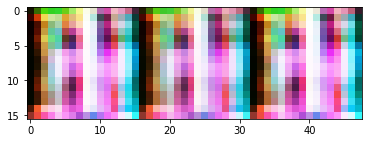

epoch: 00017
p_fake:0.508, p_real:0.510
torch.Size([512, 3, 16, 16])


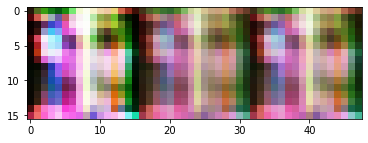

epoch: 00018
p_fake:0.504, p_real:0.503
torch.Size([512, 3, 16, 16])


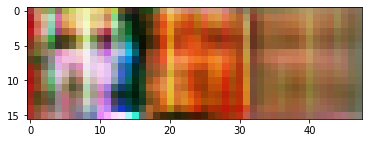

epoch: 00019
p_fake:0.502, p_real:0.497
torch.Size([512, 3, 16, 16])


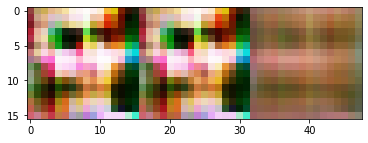

epoch: 00020
p_fake:0.503, p_real:0.501
torch.Size([512, 3, 16, 16])


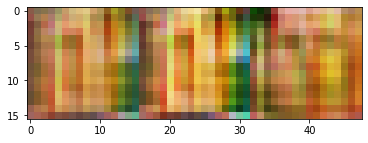

epoch: 00021
p_fake:0.492, p_real:0.492
torch.Size([512, 3, 16, 16])


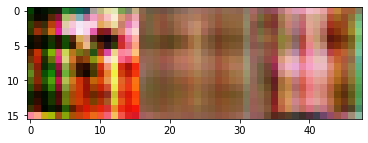

epoch: 00022
p_fake:0.507, p_real:0.502
torch.Size([512, 3, 16, 16])


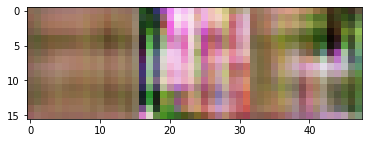

epoch: 00023
p_fake:0.496, p_real:0.492
torch.Size([512, 3, 16, 16])


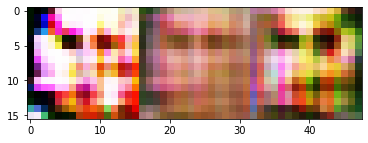

epoch: 00024
p_fake:0.494, p_real:0.490
torch.Size([512, 3, 16, 16])


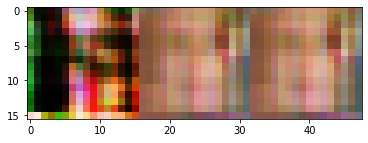

epoch: 00025
p_fake:0.528, p_real:0.515
torch.Size([512, 3, 16, 16])


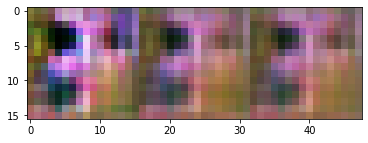

epoch: 00026
p_fake:0.513, p_real:0.508
torch.Size([512, 3, 16, 16])


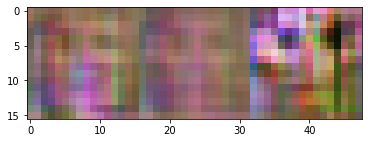

epoch: 00027
p_fake:0.500, p_real:0.496
torch.Size([512, 3, 16, 16])


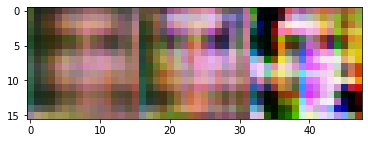

epoch: 00028
p_fake:0.503, p_real:0.502
torch.Size([512, 3, 16, 16])


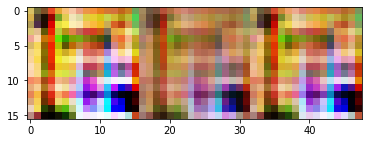

epoch: 00029
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


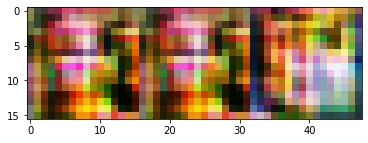

epoch: 00030
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


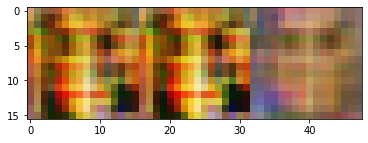

epoch: 00031
p_fake:0.499, p_real:0.500
torch.Size([512, 3, 16, 16])


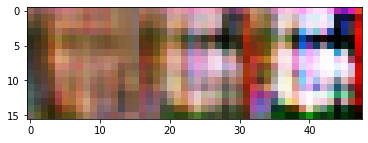

epoch: 00032
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


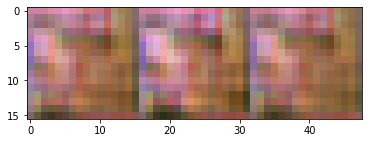

epoch: 00033
p_fake:0.498, p_real:0.496
torch.Size([512, 3, 16, 16])


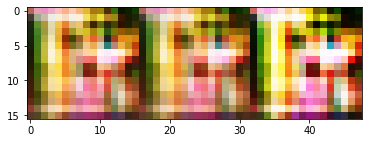

epoch: 00034
p_fake:0.494, p_real:0.494
torch.Size([512, 3, 16, 16])


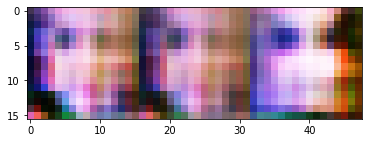

epoch: 00035
p_fake:0.520, p_real:0.523
torch.Size([512, 3, 16, 16])


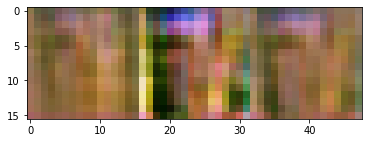

epoch: 00036
p_fake:0.498, p_real:0.492
torch.Size([512, 3, 16, 16])


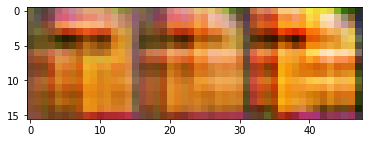

epoch: 00037
p_fake:0.511, p_real:0.511
torch.Size([512, 3, 16, 16])


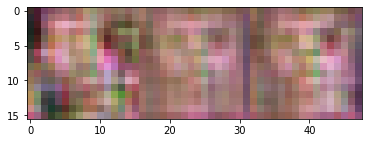

epoch: 00038
p_fake:0.498, p_real:0.499
torch.Size([512, 3, 16, 16])


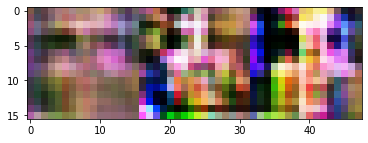

epoch: 00039
p_fake:0.512, p_real:0.513
torch.Size([512, 3, 16, 16])


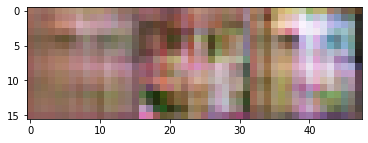

epoch: 00040
p_fake:0.525, p_real:0.524
torch.Size([512, 3, 16, 16])


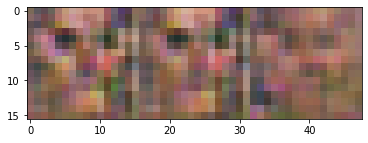

epoch: 00041
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


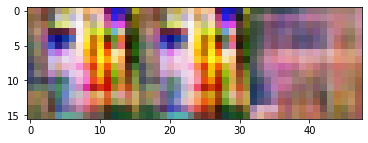

epoch: 00042
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


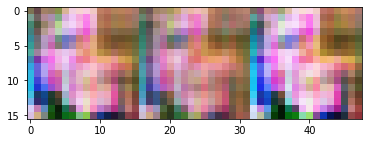

epoch: 00043
p_fake:0.504, p_real:0.504
torch.Size([512, 3, 16, 16])


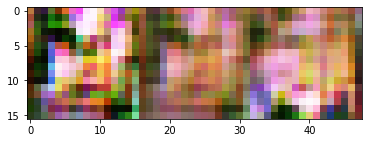

epoch: 00044
p_fake:0.494, p_real:0.493
torch.Size([512, 3, 16, 16])


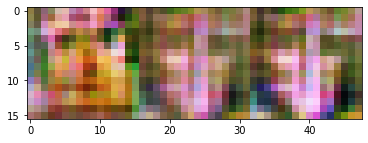

epoch: 00045
p_fake:0.498, p_real:0.497
torch.Size([512, 3, 16, 16])


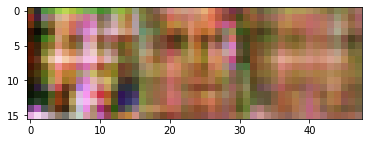

epoch: 00046
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


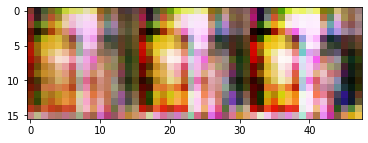

epoch: 00047
p_fake:0.508, p_real:0.508
torch.Size([512, 3, 16, 16])


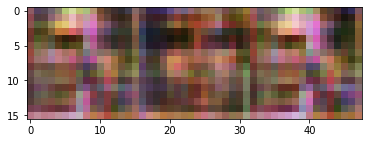

epoch: 00048
p_fake:0.500, p_real:0.501
torch.Size([512, 3, 16, 16])


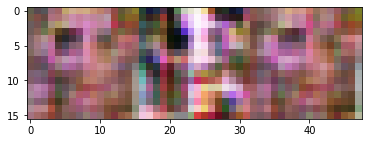

epoch: 00049
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


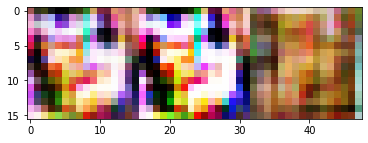

epoch: 00050
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


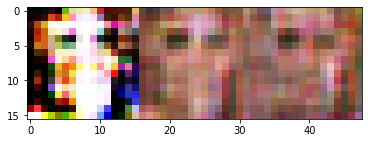

epoch: 00051
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


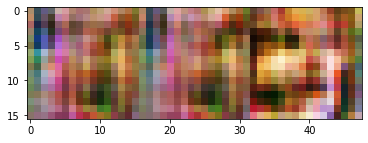

epoch: 00052
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


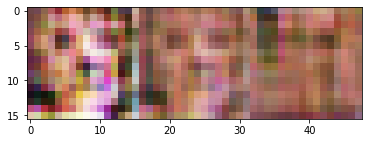

epoch: 00053
p_fake:0.507, p_real:0.508
torch.Size([512, 3, 16, 16])


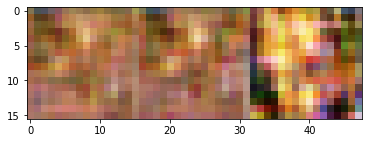

epoch: 00054
p_fake:0.507, p_real:0.501
torch.Size([512, 3, 16, 16])


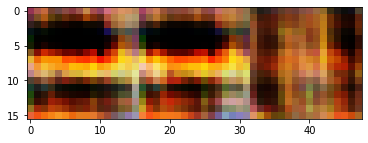

epoch: 00055
p_fake:0.493, p_real:0.504
torch.Size([512, 3, 16, 16])


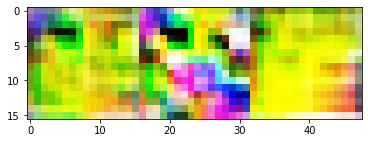

epoch: 00056
p_fake:0.492, p_real:0.485
torch.Size([512, 3, 16, 16])


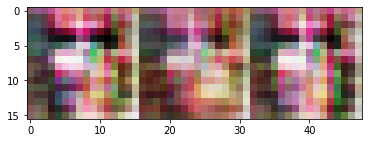

epoch: 00057
p_fake:0.516, p_real:0.515
torch.Size([512, 3, 16, 16])


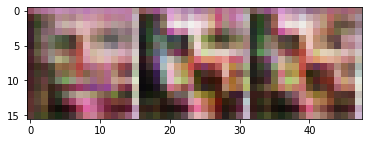

epoch: 00058
p_fake:0.497, p_real:0.495
torch.Size([512, 3, 16, 16])


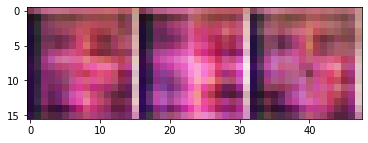

epoch: 00059
p_fake:0.506, p_real:0.507
torch.Size([512, 3, 16, 16])


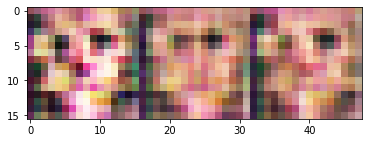

epoch: 00060
p_fake:0.500, p_real:0.502
torch.Size([512, 3, 16, 16])


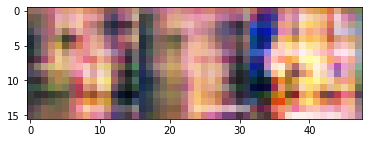

epoch: 00061
p_fake:0.505, p_real:0.505
torch.Size([512, 3, 16, 16])


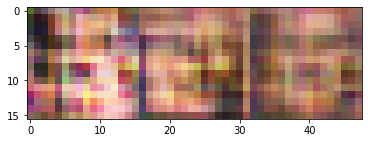

epoch: 00062
p_fake:0.501, p_real:0.497
torch.Size([512, 3, 16, 16])


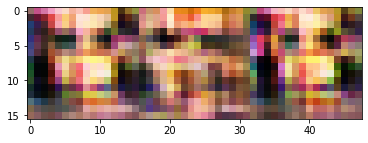

epoch: 00063
p_fake:0.514, p_real:0.514
torch.Size([512, 3, 16, 16])


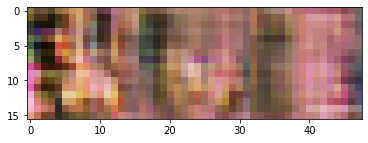

epoch: 00064
p_fake:0.506, p_real:0.502
torch.Size([512, 3, 16, 16])


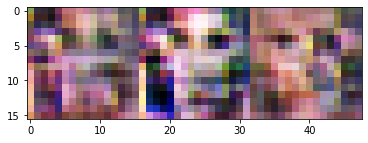

epoch: 00065
p_fake:0.497, p_real:0.496
torch.Size([512, 3, 16, 16])


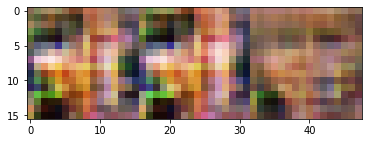

epoch: 00066
p_fake:0.500, p_real:0.498
torch.Size([512, 3, 16, 16])


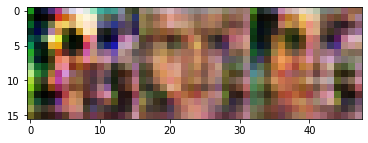

epoch: 00067
p_fake:0.498, p_real:0.496
torch.Size([512, 3, 16, 16])


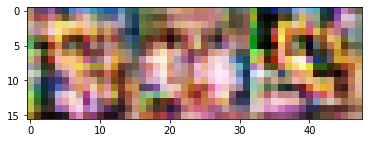

epoch: 00068
p_fake:0.496, p_real:0.496
torch.Size([512, 3, 16, 16])


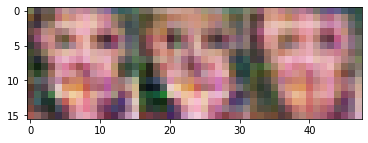

epoch: 00069
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


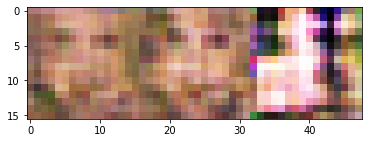

epoch: 00070
p_fake:0.505, p_real:0.504
torch.Size([512, 3, 16, 16])


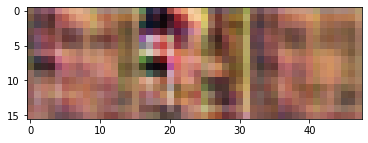

epoch: 00071
p_fake:0.498, p_real:0.497
torch.Size([512, 3, 16, 16])


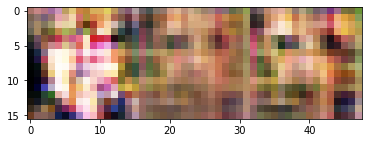

epoch: 00072
p_fake:0.508, p_real:0.508
torch.Size([512, 3, 16, 16])


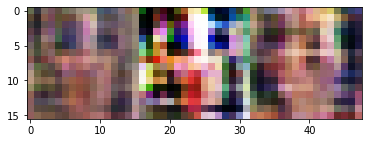

epoch: 00073
p_fake:0.496, p_real:0.497
torch.Size([512, 3, 16, 16])


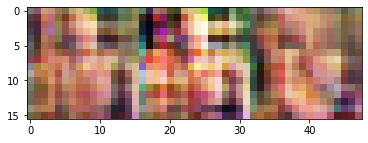

epoch: 00074
p_fake:0.503, p_real:0.503
torch.Size([512, 3, 16, 16])


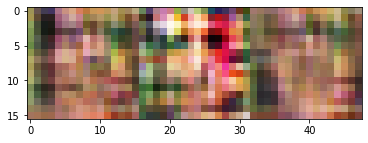

epoch: 00075
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


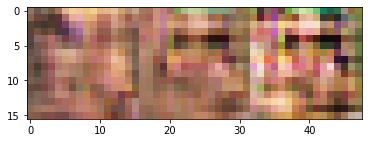

epoch: 00076
p_fake:0.502, p_real:0.503
torch.Size([512, 3, 16, 16])


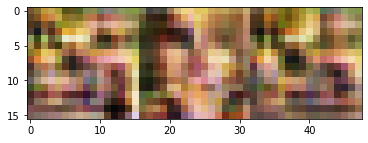

epoch: 00077
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


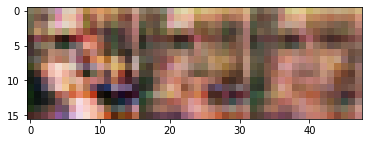

epoch: 00078
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


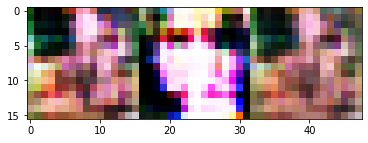

epoch: 00079
p_fake:0.499, p_real:0.500
torch.Size([512, 3, 16, 16])


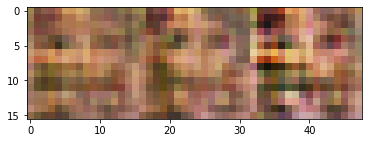

epoch: 00080
p_fake:0.505, p_real:0.505
torch.Size([512, 3, 16, 16])


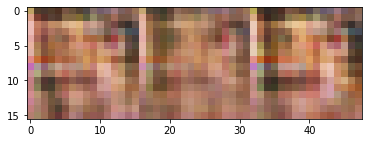

epoch: 00081
p_fake:0.492, p_real:0.494
torch.Size([512, 3, 16, 16])


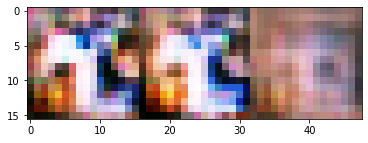

epoch: 00082
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


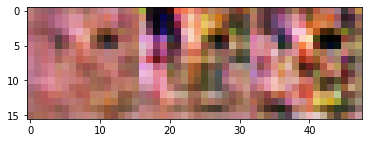

epoch: 00083
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


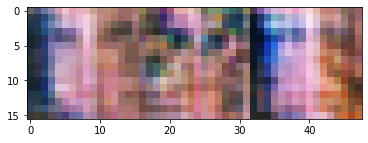

epoch: 00084
p_fake:0.496, p_real:0.499
torch.Size([512, 3, 16, 16])


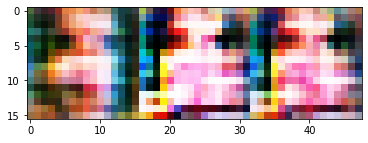

epoch: 00085
p_fake:0.513, p_real:0.514
torch.Size([512, 3, 16, 16])


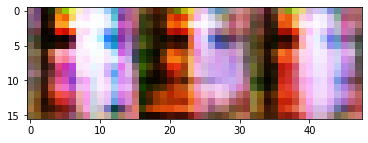

epoch: 00086
p_fake:0.505, p_real:0.509
torch.Size([512, 3, 16, 16])


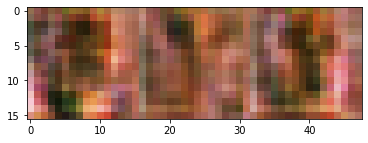

epoch: 00087
p_fake:0.510, p_real:0.509
torch.Size([512, 3, 16, 16])


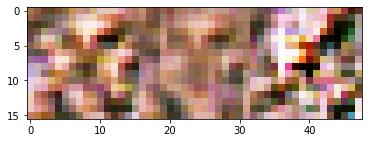

epoch: 00088
p_fake:0.503, p_real:0.502
torch.Size([512, 3, 16, 16])


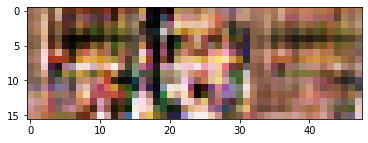

epoch: 00089
p_fake:0.500, p_real:0.501
torch.Size([512, 3, 16, 16])


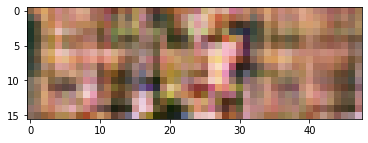

epoch: 00090
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


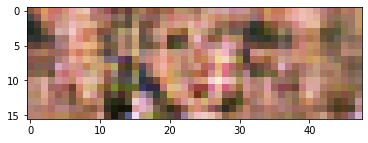

epoch: 00091
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


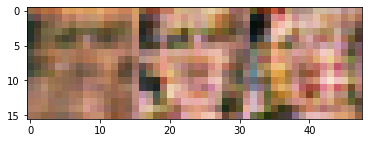

epoch: 00092
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


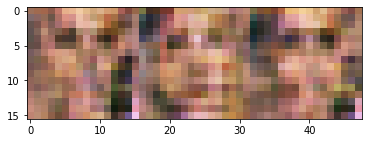

epoch: 00093
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


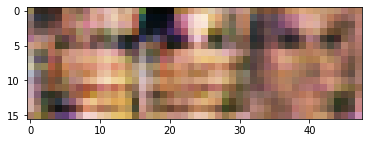

epoch: 00094
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


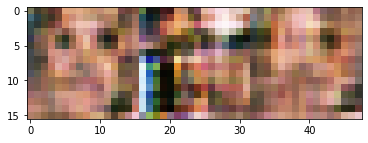

epoch: 00095
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


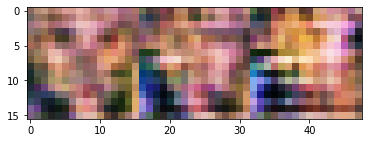

epoch: 00096
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


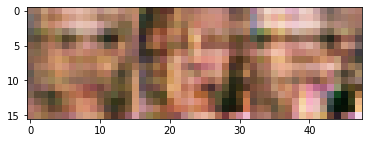

epoch: 00097
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


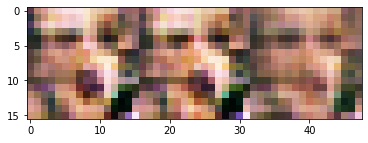

epoch: 00098
p_fake:0.500, p_real:0.501
torch.Size([512, 3, 16, 16])


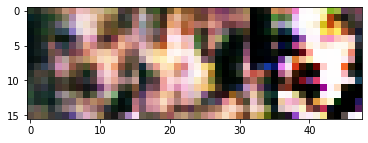

epoch: 00099
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


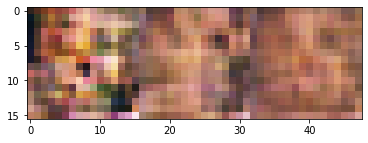

epoch: 00100
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


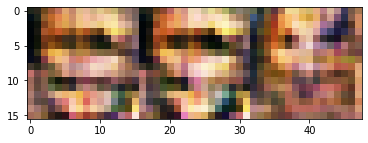

epoch: 00101
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


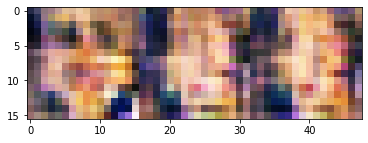

epoch: 00102
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


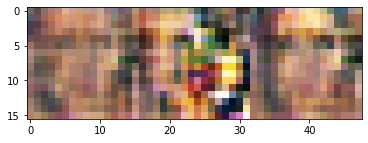

epoch: 00103
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


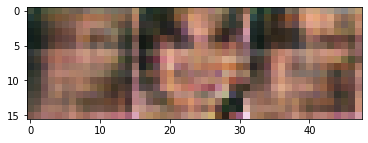

epoch: 00104
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


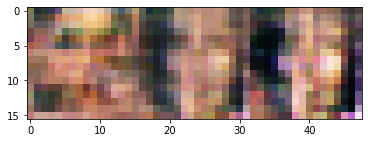

epoch: 00105
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


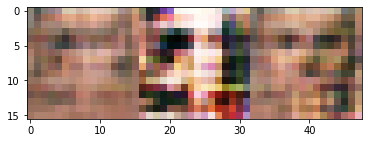

epoch: 00106
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


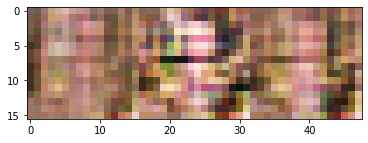

epoch: 00107
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


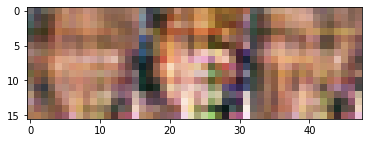

epoch: 00108
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


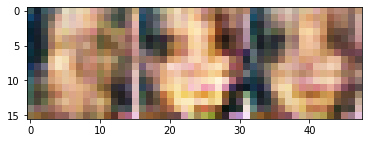

epoch: 00109
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


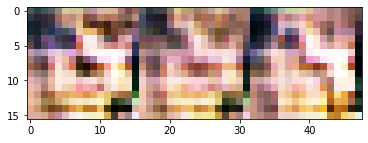

epoch: 00110
p_fake:0.495, p_real:0.494
torch.Size([512, 3, 16, 16])


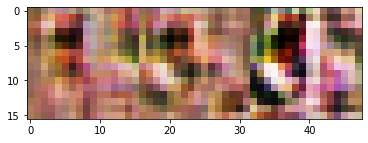

epoch: 00111
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


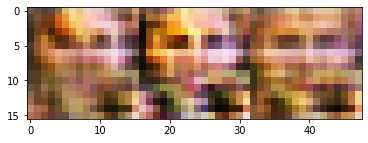

epoch: 00112
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


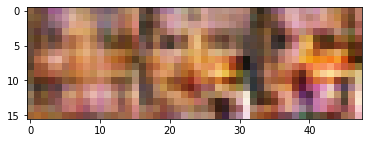

epoch: 00113
p_fake:0.593, p_real:0.522
torch.Size([512, 3, 16, 16])


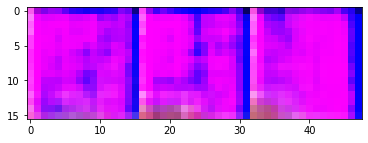

epoch: 00114
p_fake:0.099, p_real:0.975
torch.Size([512, 3, 16, 16])


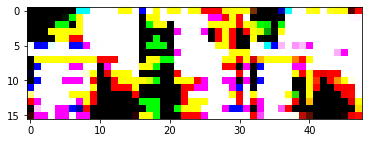

epoch: 00115
p_fake:0.128, p_real:0.954
torch.Size([512, 3, 16, 16])


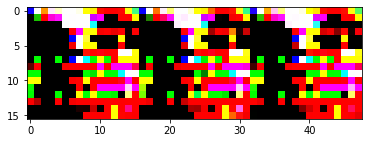

epoch: 00116
p_fake:0.513, p_real:0.471
torch.Size([512, 3, 16, 16])


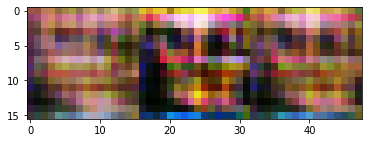

epoch: 00117
p_fake:0.490, p_real:0.485
torch.Size([512, 3, 16, 16])


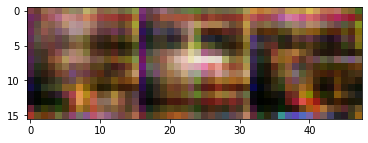

epoch: 00118
p_fake:0.490, p_real:0.493
torch.Size([512, 3, 16, 16])


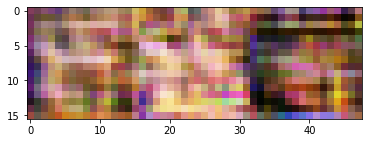

epoch: 00119
p_fake:0.501, p_real:0.502
torch.Size([512, 3, 16, 16])


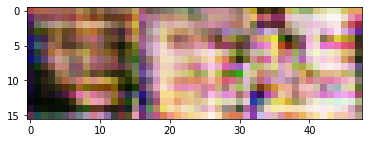

epoch: 00120
p_fake:0.499, p_real:0.504
torch.Size([512, 3, 16, 16])


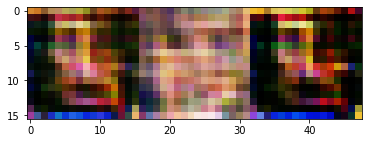

epoch: 00121
p_fake:0.512, p_real:0.510
torch.Size([512, 3, 16, 16])


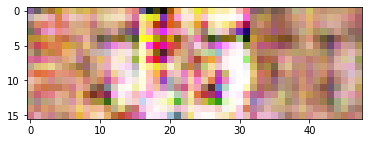

epoch: 00122
p_fake:0.504, p_real:0.502
torch.Size([512, 3, 16, 16])


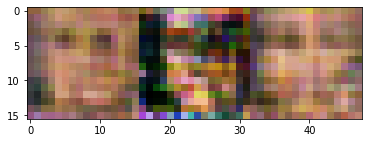

epoch: 00123
p_fake:0.488, p_real:0.490
torch.Size([512, 3, 16, 16])


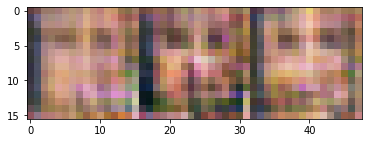

epoch: 00124
p_fake:0.506, p_real:0.495
torch.Size([512, 3, 16, 16])


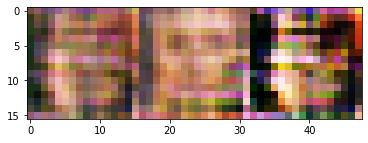

epoch: 00125
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


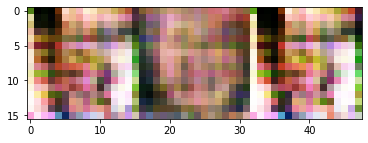

epoch: 00126
p_fake:0.516, p_real:0.517
torch.Size([512, 3, 16, 16])


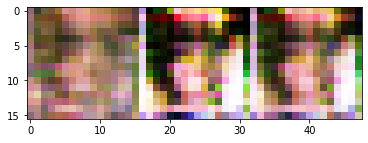

epoch: 00127
p_fake:0.518, p_real:0.519
torch.Size([512, 3, 16, 16])


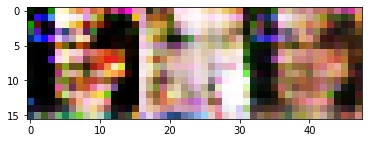

epoch: 00128
p_fake:0.512, p_real:0.503
torch.Size([512, 3, 16, 16])


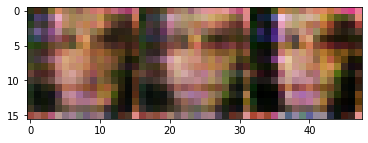

epoch: 00129
p_fake:0.517, p_real:0.512
torch.Size([512, 3, 16, 16])


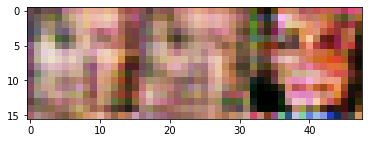

epoch: 00130
p_fake:0.502, p_real:0.500
torch.Size([512, 3, 16, 16])


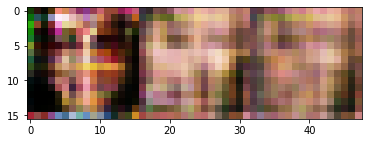

epoch: 00131
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


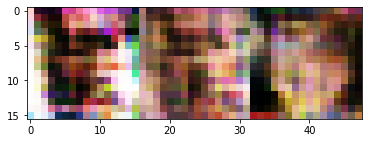

epoch: 00132
p_fake:0.507, p_real:0.503
torch.Size([512, 3, 16, 16])


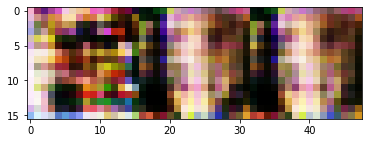

epoch: 00133
p_fake:0.486, p_real:0.482
torch.Size([512, 3, 16, 16])


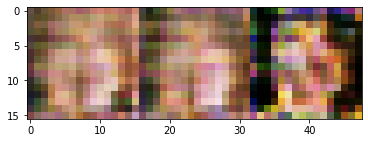

epoch: 00134
p_fake:0.502, p_real:0.499
torch.Size([512, 3, 16, 16])


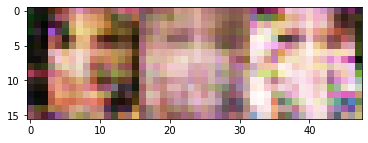

epoch: 00135
p_fake:0.505, p_real:0.506
torch.Size([512, 3, 16, 16])


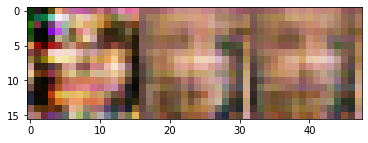

epoch: 00136
p_fake:0.505, p_real:0.497
torch.Size([512, 3, 16, 16])


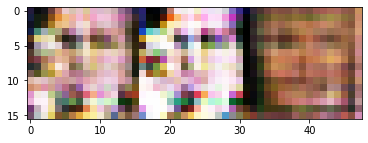

epoch: 00137
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


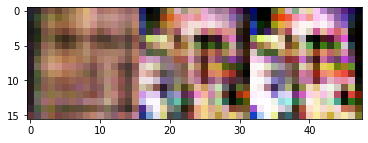

epoch: 00138
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


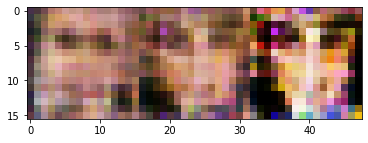

epoch: 00139
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


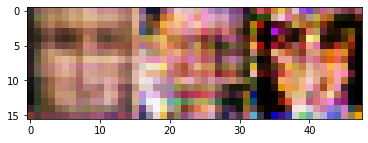

epoch: 00140
p_fake:0.506, p_real:0.505
torch.Size([512, 3, 16, 16])


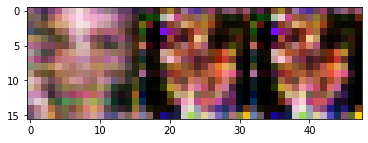

epoch: 00141
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


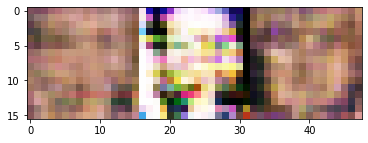

epoch: 00142
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


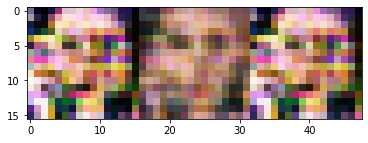

epoch: 00143
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


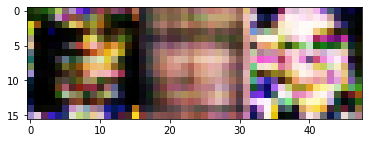

epoch: 00144
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


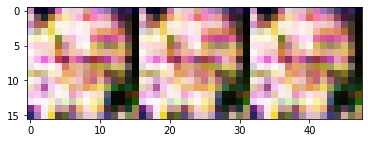

epoch: 00145
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


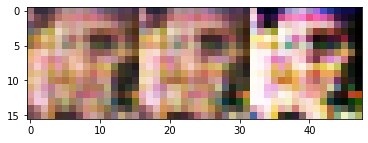

epoch: 00146
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


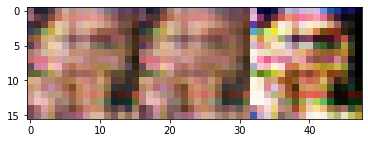

epoch: 00147
p_fake:0.508, p_real:0.504
torch.Size([512, 3, 16, 16])


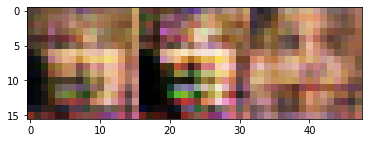

epoch: 00148
p_fake:0.518, p_real:0.527
torch.Size([512, 3, 16, 16])


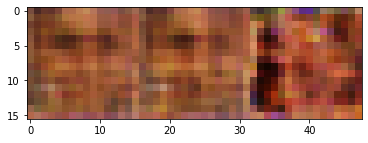

epoch: 00149
p_fake:0.507, p_real:0.505
torch.Size([512, 3, 16, 16])


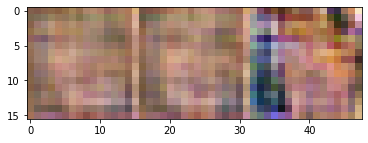

epoch: 00150
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


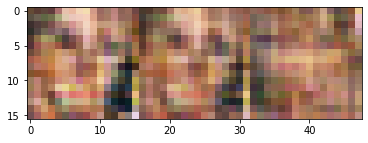

epoch: 00151
p_fake:0.498, p_real:0.499
torch.Size([512, 3, 16, 16])


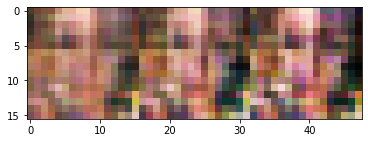

epoch: 00152
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


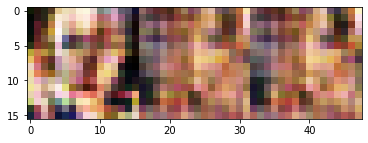

epoch: 00153
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


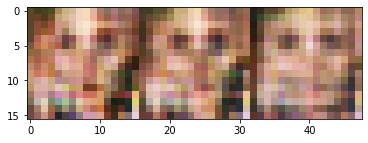

epoch: 00154
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


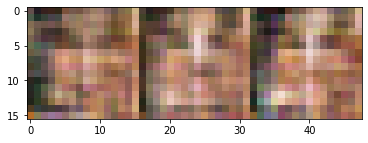

epoch: 00155
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


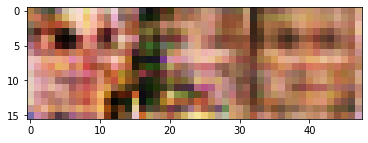

epoch: 00156
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


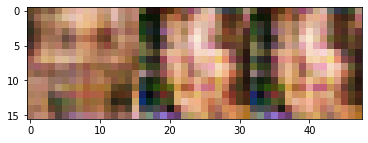

epoch: 00157
p_fake:0.502, p_real:0.499
torch.Size([512, 3, 16, 16])


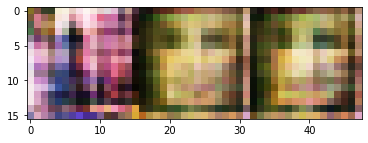

epoch: 00158
p_fake:0.504, p_real:0.504
torch.Size([512, 3, 16, 16])


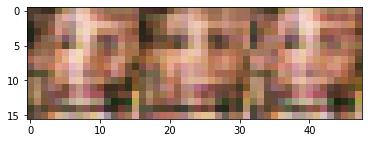

epoch: 00159
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


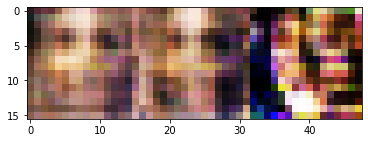

epoch: 00160
p_fake:0.501, p_real:0.498
torch.Size([512, 3, 16, 16])


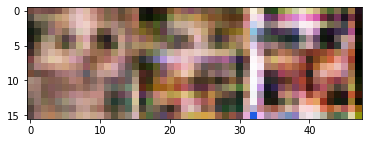

epoch: 00161
p_fake:0.497, p_real:0.490
torch.Size([512, 3, 16, 16])


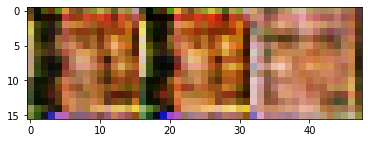

epoch: 00162
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


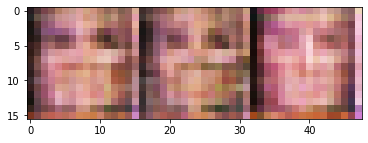

epoch: 00163
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


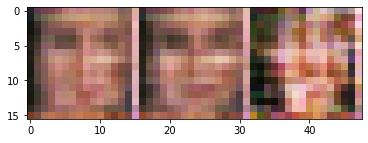

epoch: 00164
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


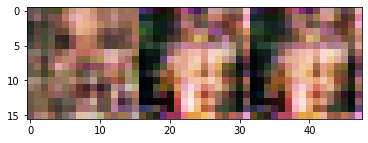

epoch: 00165
p_fake:0.498, p_real:0.494
torch.Size([512, 3, 16, 16])


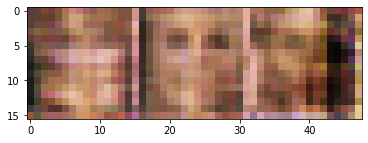

epoch: 00166
p_fake:0.501, p_real:0.502
torch.Size([512, 3, 16, 16])


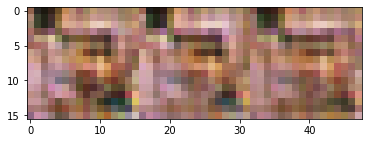

epoch: 00167
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


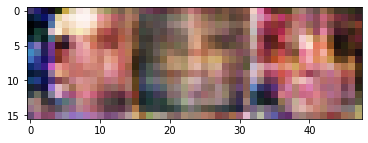

epoch: 00168
p_fake:0.500, p_real:0.497
torch.Size([512, 3, 16, 16])


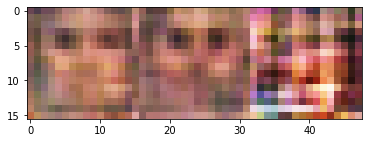

epoch: 00169
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


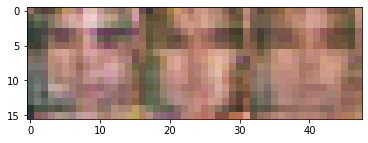

epoch: 00170
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


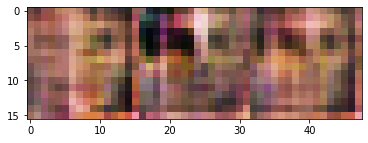

epoch: 00171
p_fake:0.498, p_real:0.503
torch.Size([512, 3, 16, 16])


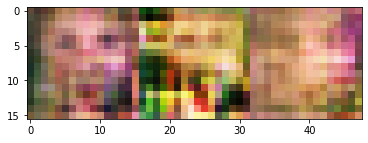

epoch: 00172
p_fake:0.513, p_real:0.508
torch.Size([512, 3, 16, 16])


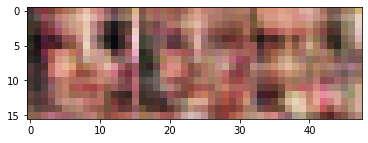

epoch: 00173
p_fake:0.504, p_real:0.523
torch.Size([512, 3, 16, 16])


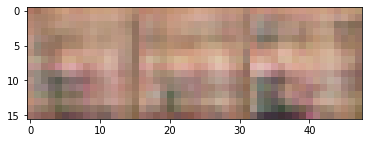

epoch: 00174
p_fake:0.508, p_real:0.498
torch.Size([512, 3, 16, 16])


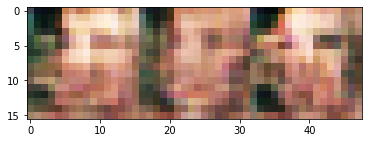

epoch: 00175
p_fake:0.496, p_real:0.494
torch.Size([512, 3, 16, 16])


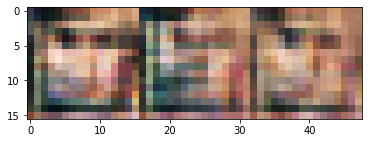

epoch: 00176
p_fake:0.503, p_real:0.502
torch.Size([512, 3, 16, 16])


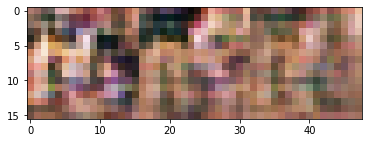

epoch: 00177
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


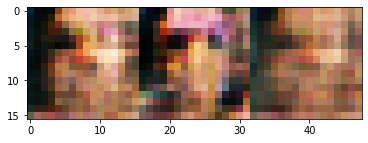

epoch: 00178
p_fake:0.498, p_real:0.495
torch.Size([512, 3, 16, 16])


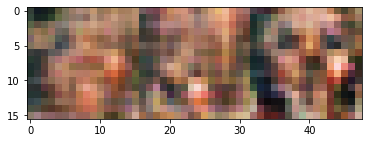

epoch: 00179
p_fake:0.498, p_real:0.496
torch.Size([512, 3, 16, 16])


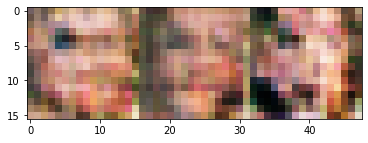

epoch: 00180
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


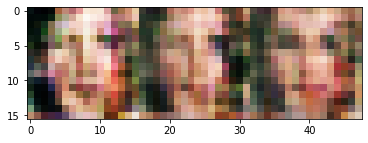

epoch: 00181
p_fake:0.503, p_real:0.503
torch.Size([512, 3, 16, 16])


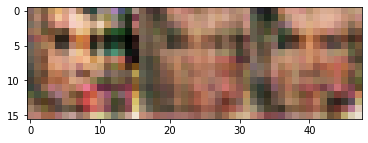

epoch: 00182
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


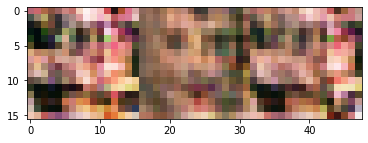

epoch: 00183
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


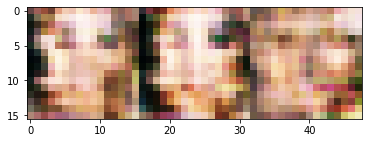

epoch: 00184
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


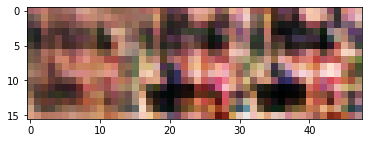

epoch: 00185
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


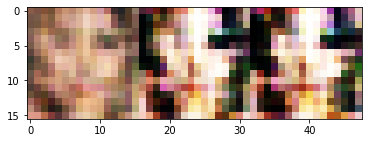

epoch: 00186
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


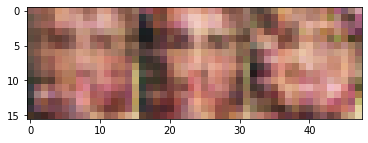

epoch: 00187
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


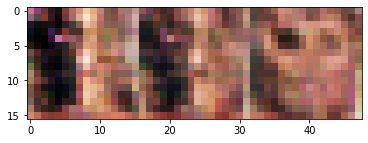

epoch: 00188
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


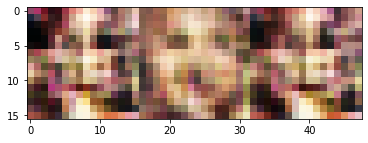

epoch: 00189
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


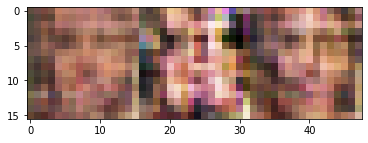

epoch: 00190
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


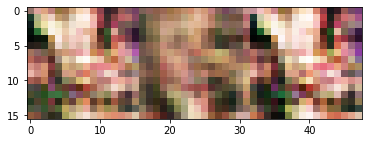

epoch: 00191
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


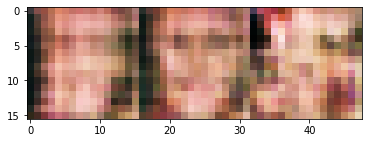

epoch: 00192
p_fake:0.501, p_real:0.503
torch.Size([512, 3, 16, 16])


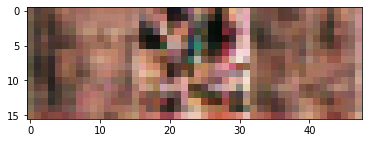

epoch: 00193
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


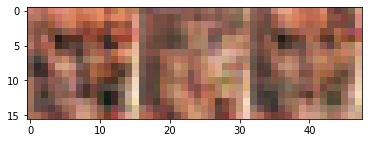

epoch: 00194
p_fake:0.503, p_real:0.502
torch.Size([512, 3, 16, 16])


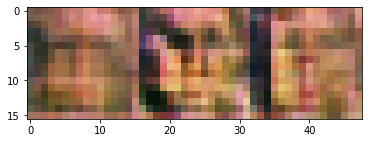

epoch: 00195
p_fake:0.501, p_real:0.499
torch.Size([512, 3, 16, 16])


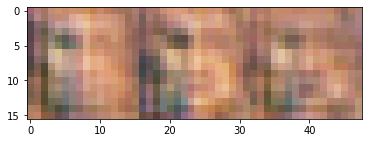

epoch: 00196
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


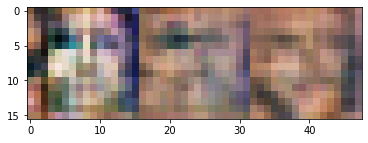

epoch: 00197
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


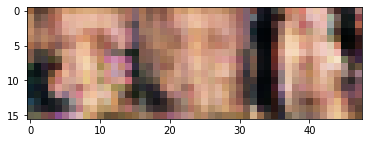

epoch: 00198
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


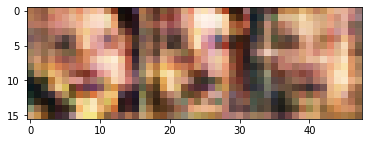

epoch: 00199
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


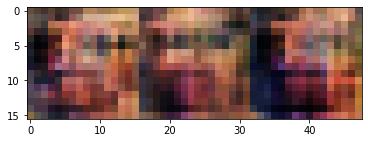

epoch: 00200
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


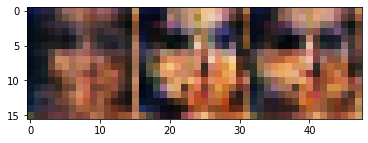

epoch: 00201
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


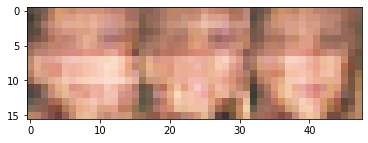

epoch: 00202
p_fake:0.499, p_real:0.497
torch.Size([512, 3, 16, 16])


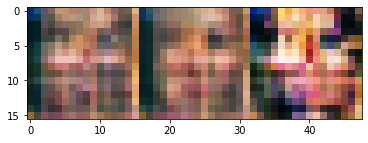

epoch: 00203
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


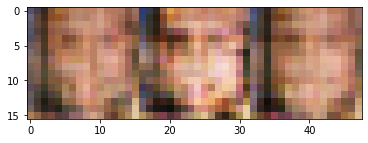

epoch: 00204
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


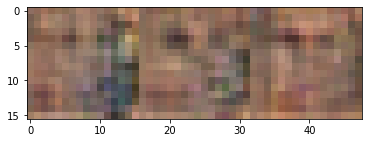

epoch: 00205
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


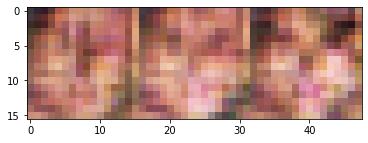

epoch: 00206
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


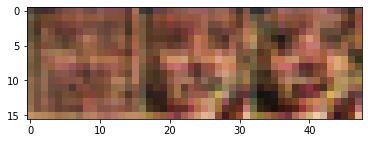

epoch: 00207
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


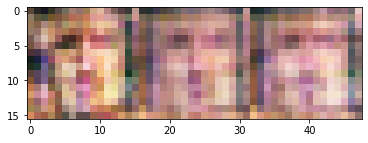

epoch: 00208
p_fake:0.503, p_real:0.502
torch.Size([512, 3, 16, 16])


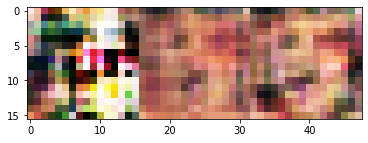

epoch: 00209
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


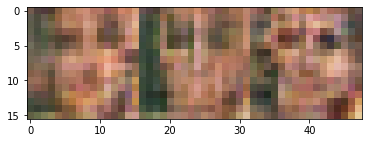

epoch: 00210
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


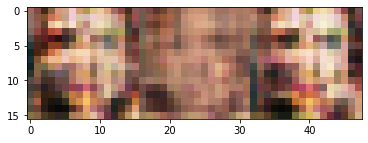

epoch: 00211
p_fake:0.504, p_real:0.503
torch.Size([512, 3, 16, 16])


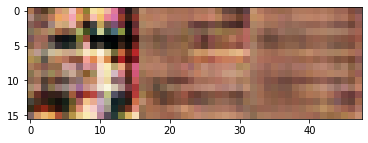

epoch: 00212
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


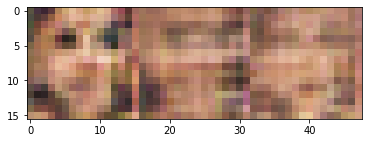

epoch: 00213
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


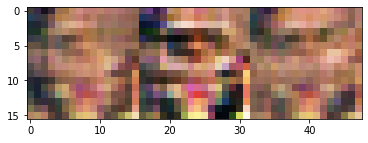

epoch: 00214
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


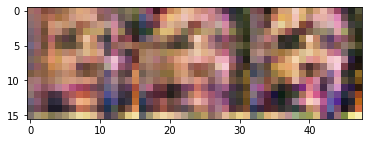

epoch: 00215
p_fake:0.500, p_real:0.501
torch.Size([512, 3, 16, 16])


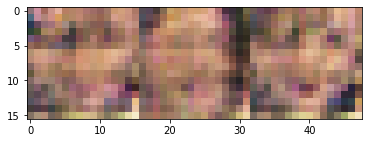

epoch: 00216
p_fake:0.545, p_real:0.555
torch.Size([512, 3, 16, 16])


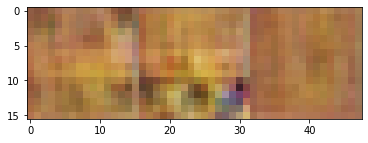

epoch: 00217
p_fake:0.492, p_real:0.471
torch.Size([512, 3, 16, 16])


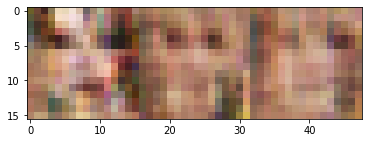

epoch: 00218
p_fake:0.501, p_real:0.492
torch.Size([512, 3, 16, 16])


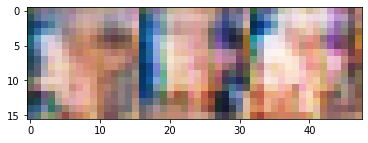

epoch: 00219
p_fake:0.532, p_real:0.510
torch.Size([512, 3, 16, 16])


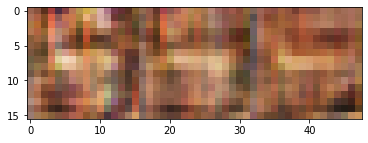

epoch: 00220
p_fake:0.506, p_real:0.491
torch.Size([512, 3, 16, 16])


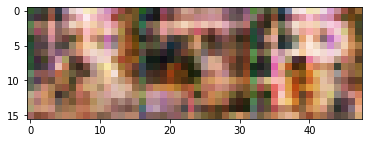

epoch: 00221
p_fake:0.489, p_real:0.483
torch.Size([512, 3, 16, 16])


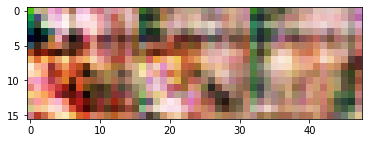

epoch: 00222
p_fake:0.508, p_real:0.502
torch.Size([512, 3, 16, 16])


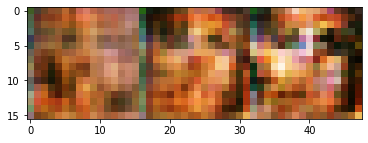

epoch: 00223
p_fake:0.502, p_real:0.504
torch.Size([512, 3, 16, 16])


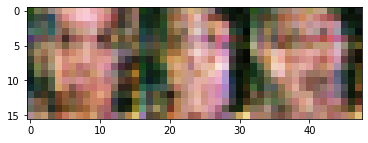

epoch: 00224
p_fake:0.485, p_real:0.482
torch.Size([512, 3, 16, 16])


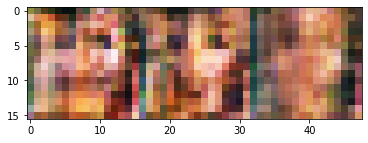

epoch: 00225
p_fake:0.514, p_real:0.511
torch.Size([512, 3, 16, 16])


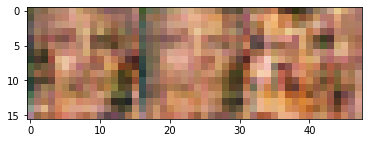

epoch: 00226
p_fake:0.504, p_real:0.503
torch.Size([512, 3, 16, 16])


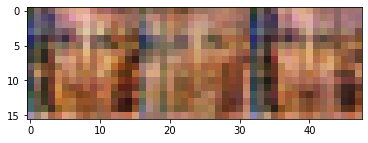

epoch: 00227
p_fake:0.496, p_real:0.496
torch.Size([512, 3, 16, 16])


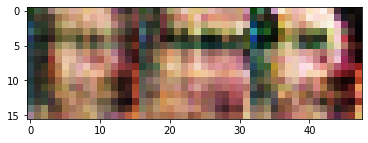

epoch: 00228
p_fake:0.500, p_real:0.498
torch.Size([512, 3, 16, 16])


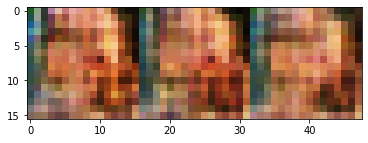

epoch: 00229
p_fake:0.489, p_real:0.491
torch.Size([512, 3, 16, 16])


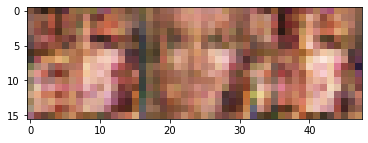

epoch: 00230
p_fake:0.516, p_real:0.514
torch.Size([512, 3, 16, 16])


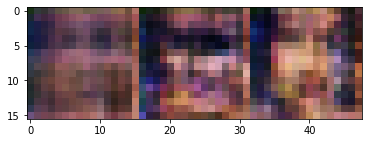

epoch: 00231
p_fake:0.505, p_real:0.504
torch.Size([512, 3, 16, 16])


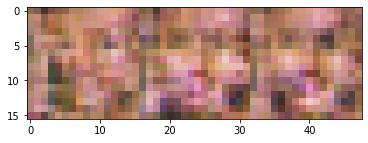

epoch: 00232
p_fake:0.490, p_real:0.492
torch.Size([512, 3, 16, 16])


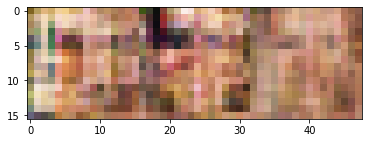

epoch: 00233
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


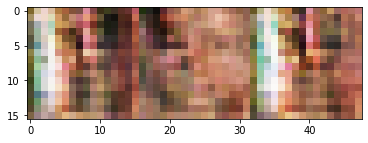

epoch: 00234
p_fake:0.503, p_real:0.501
torch.Size([512, 3, 16, 16])


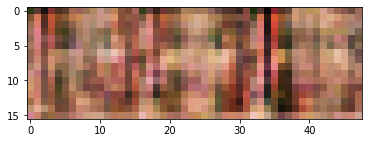

epoch: 00235
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


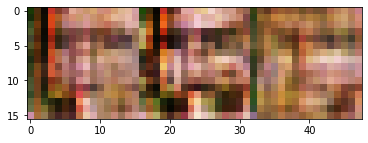

epoch: 00236
p_fake:0.505, p_real:0.503
torch.Size([512, 3, 16, 16])


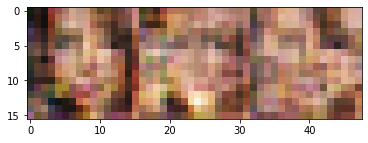

epoch: 00237
p_fake:0.498, p_real:0.497
torch.Size([512, 3, 16, 16])


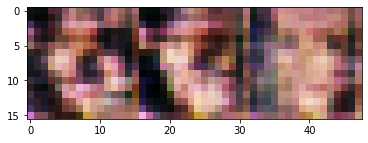

epoch: 00238
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


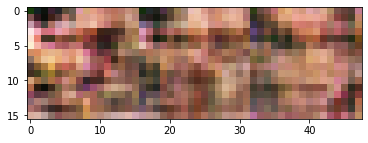

epoch: 00239
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


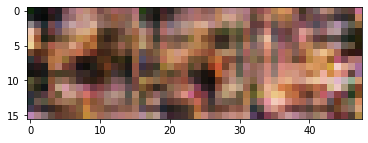

epoch: 00240
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


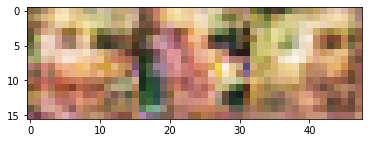

epoch: 00241
p_fake:0.504, p_real:0.506
torch.Size([512, 3, 16, 16])


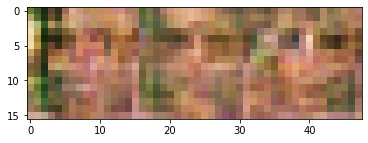

epoch: 00242
p_fake:0.503, p_real:0.504
torch.Size([512, 3, 16, 16])


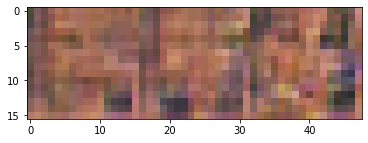

epoch: 00243
p_fake:0.513, p_real:0.505
torch.Size([512, 3, 16, 16])


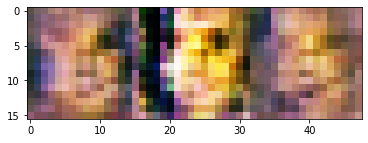

epoch: 00244
p_fake:0.519, p_real:0.505
torch.Size([512, 3, 16, 16])


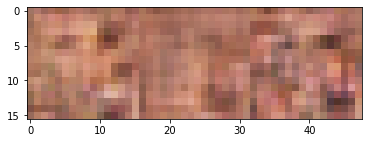

epoch: 00245
p_fake:0.503, p_real:0.501
torch.Size([512, 3, 16, 16])


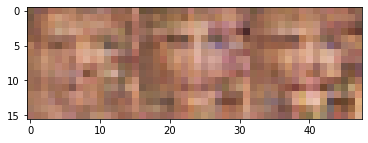

epoch: 00246
p_fake:0.496, p_real:0.497
torch.Size([512, 3, 16, 16])


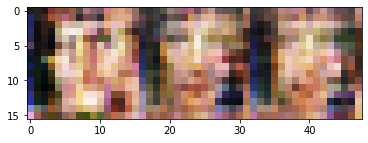

epoch: 00247
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


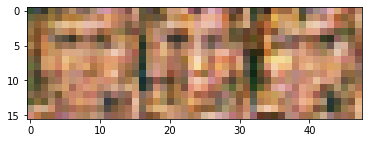

epoch: 00248
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


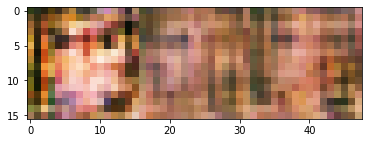

epoch: 00249
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


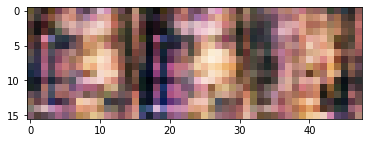

epoch: 00250
p_fake:0.503, p_real:0.503
torch.Size([512, 3, 16, 16])


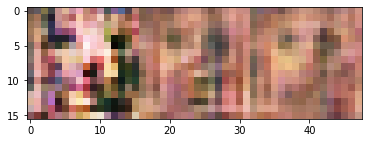

epoch: 00251
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


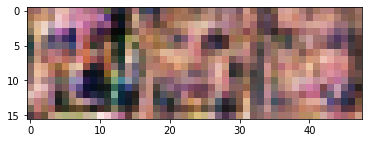

epoch: 00252
p_fake:0.503, p_real:0.501
torch.Size([512, 3, 16, 16])


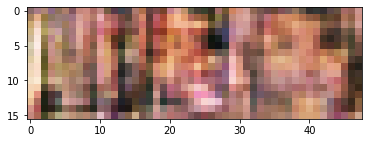

epoch: 00253
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


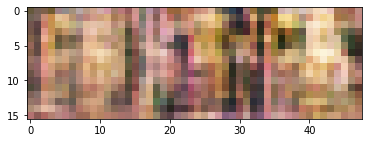

epoch: 00254
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


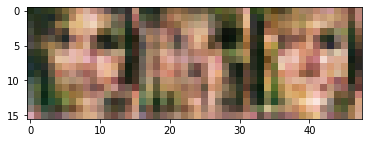

epoch: 00255
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


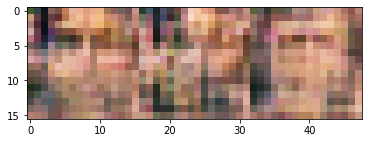

epoch: 00256
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


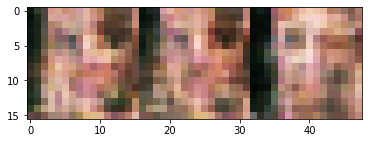

epoch: 00257
p_fake:0.506, p_real:0.507
torch.Size([512, 3, 16, 16])


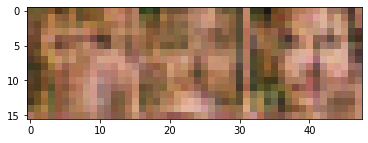

epoch: 00258
p_fake:0.502, p_real:0.503
torch.Size([512, 3, 16, 16])


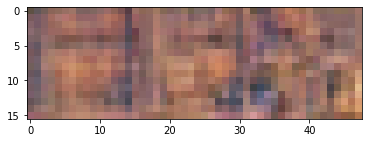

epoch: 00259
p_fake:0.496, p_real:0.493
torch.Size([512, 3, 16, 16])


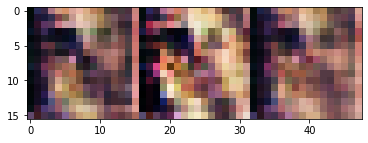

epoch: 00260
p_fake:0.499, p_real:0.496
torch.Size([512, 3, 16, 16])


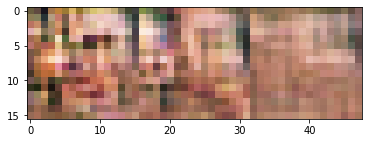

epoch: 00261
p_fake:0.503, p_real:0.500
torch.Size([512, 3, 16, 16])


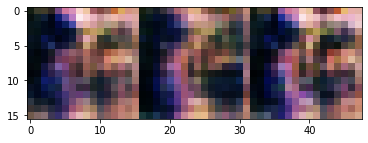

epoch: 00262
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


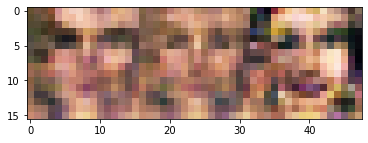

epoch: 00263
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


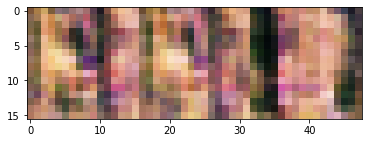

epoch: 00264
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


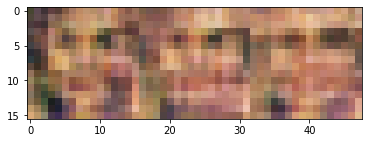

epoch: 00265
p_fake:0.497, p_real:0.498
torch.Size([512, 3, 16, 16])


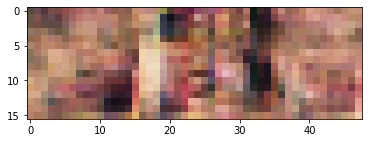

epoch: 00266
p_fake:0.505, p_real:0.504
torch.Size([512, 3, 16, 16])


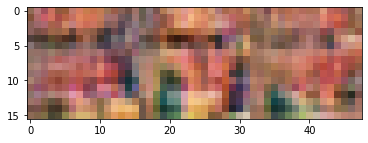

epoch: 00267
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


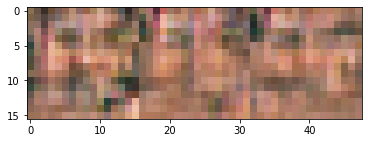

epoch: 00268
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


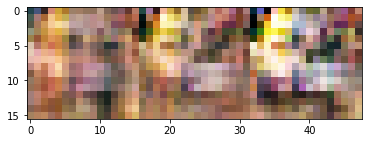

epoch: 00269
p_fake:0.513, p_real:0.503
torch.Size([512, 3, 16, 16])


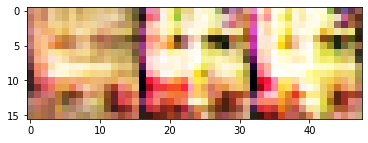

epoch: 00270
p_fake:0.507, p_real:0.503
torch.Size([512, 3, 16, 16])


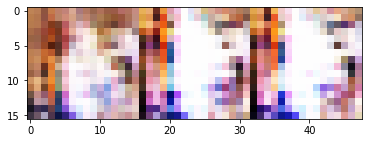

epoch: 00271
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


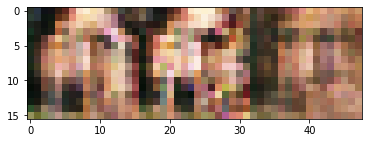

epoch: 00272
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


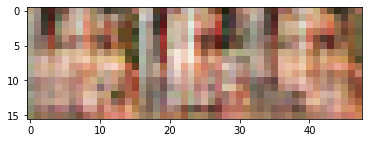

epoch: 00273
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


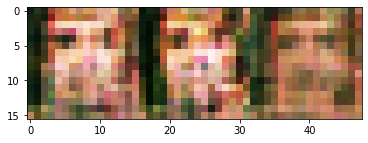

epoch: 00274
p_fake:0.500, p_real:0.498
torch.Size([512, 3, 16, 16])


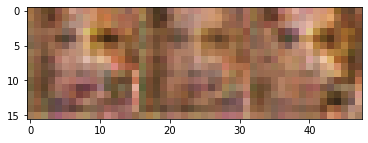

epoch: 00275
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


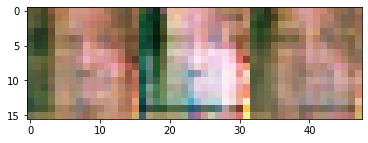

epoch: 00276
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


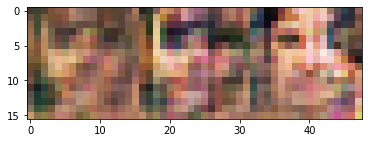

epoch: 00277
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


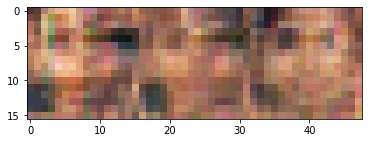

epoch: 00278
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


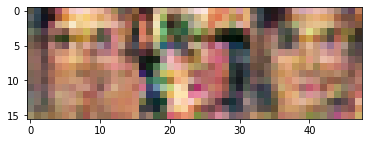

epoch: 00279
p_fake:0.501, p_real:0.502
torch.Size([512, 3, 16, 16])


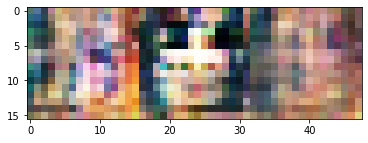

epoch: 00280
p_fake:0.506, p_real:0.505
torch.Size([512, 3, 16, 16])


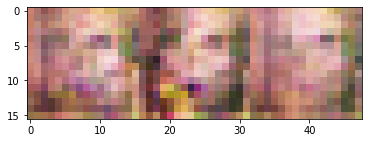

epoch: 00281
p_fake:0.492, p_real:0.492
torch.Size([512, 3, 16, 16])


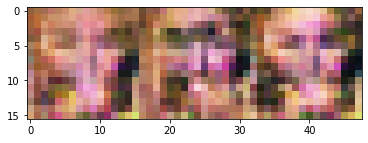

epoch: 00282
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


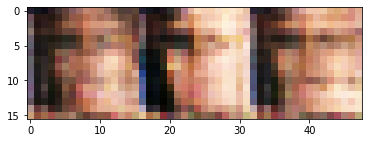

epoch: 00283
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


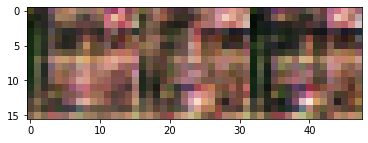

epoch: 00284
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


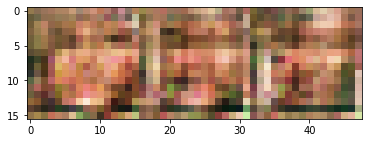

epoch: 00285
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


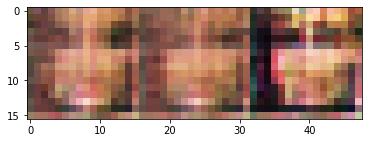

epoch: 00286
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


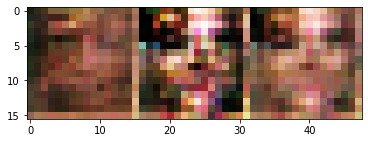

epoch: 00287
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


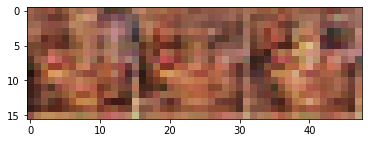

epoch: 00288
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


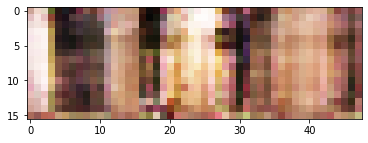

epoch: 00289
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


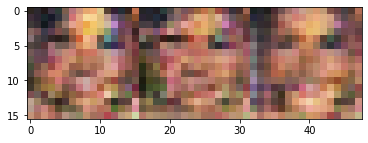

epoch: 00290
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


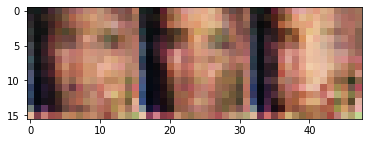

epoch: 00291
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


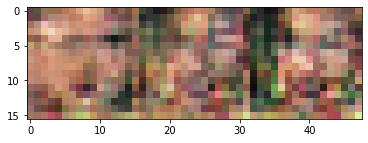

epoch: 00292
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


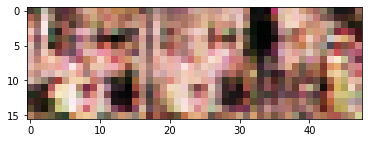

epoch: 00293
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


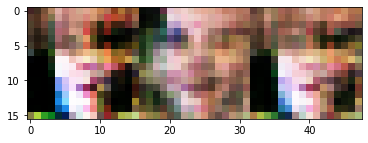

epoch: 00294
p_fake:0.500, p_real:0.501
torch.Size([512, 3, 16, 16])


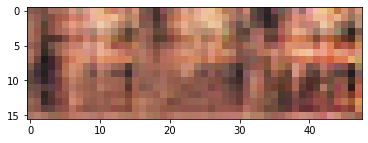

epoch: 00295
p_fake:0.495, p_real:0.485
torch.Size([512, 3, 16, 16])


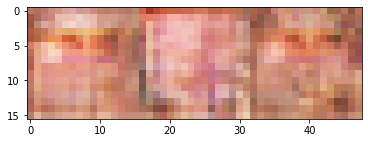

epoch: 00296
p_fake:0.504, p_real:0.496
torch.Size([512, 3, 16, 16])


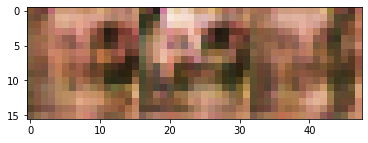

epoch: 00297
p_fake:0.526, p_real:0.516
torch.Size([512, 3, 16, 16])


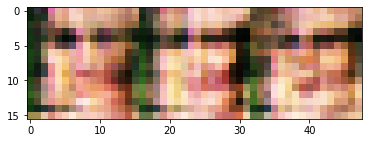

epoch: 00298
p_fake:0.498, p_real:0.497
torch.Size([512, 3, 16, 16])


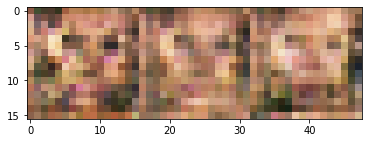

epoch: 00299
p_fake:0.505, p_real:0.504
torch.Size([512, 3, 16, 16])


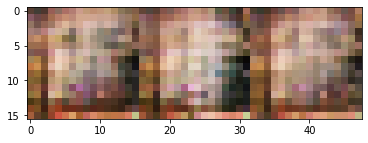

epoch: 00300
p_fake:0.498, p_real:0.499
torch.Size([512, 3, 16, 16])


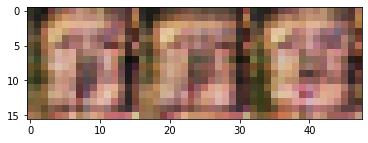

epoch: 00301
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


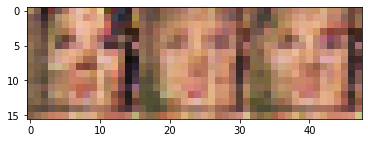

epoch: 00302
p_fake:0.507, p_real:0.508
torch.Size([512, 3, 16, 16])


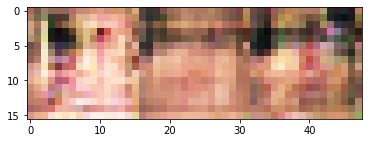

epoch: 00303
p_fake:0.500, p_real:0.498
torch.Size([512, 3, 16, 16])


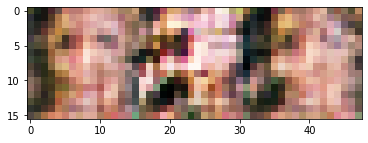

epoch: 00304
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


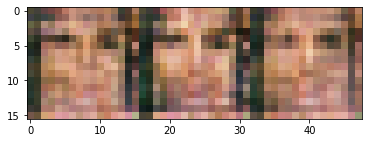

epoch: 00305
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


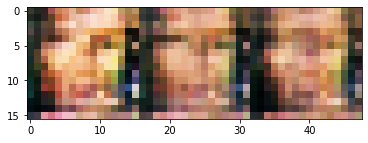

epoch: 00306
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


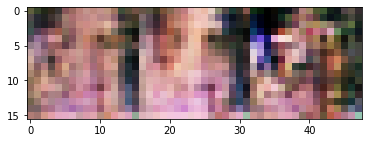

epoch: 00307
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


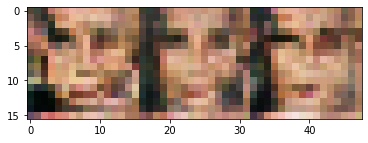

epoch: 00308
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


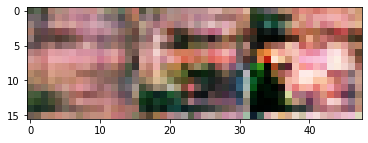

epoch: 00309
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


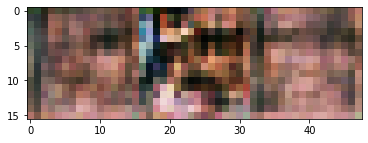

epoch: 00310
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


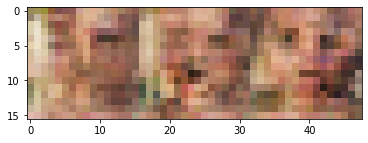

epoch: 00311
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


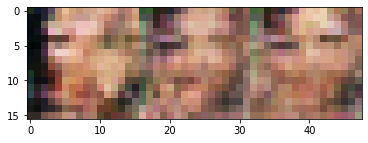

epoch: 00312
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


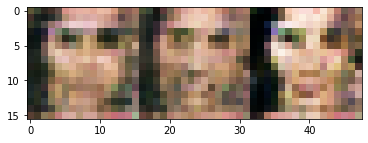

epoch: 00313
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


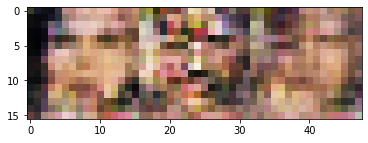

epoch: 00314
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


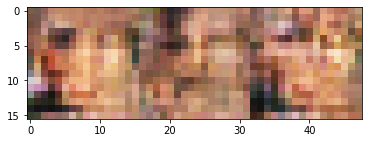

epoch: 00315
p_fake:0.505, p_real:0.504
torch.Size([512, 3, 16, 16])


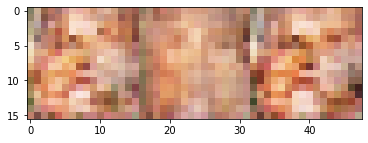

epoch: 00316
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


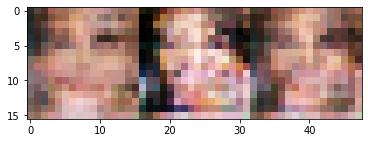

epoch: 00317
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


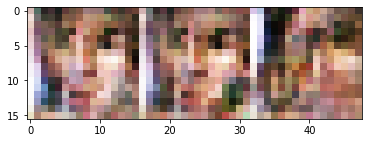

epoch: 00318
p_fake:0.497, p_real:0.496
torch.Size([512, 3, 16, 16])


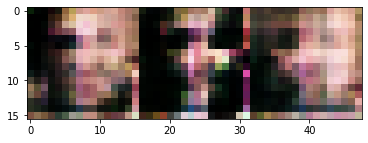

epoch: 00319
p_fake:0.495, p_real:0.494
torch.Size([512, 3, 16, 16])


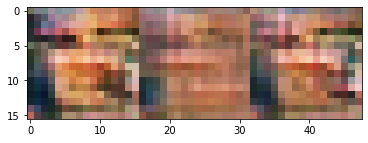

epoch: 00320
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


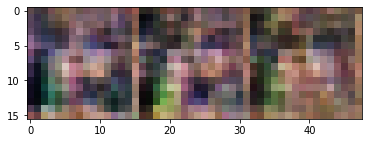

epoch: 00321
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


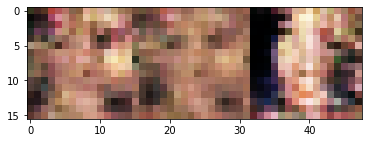

epoch: 00322
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


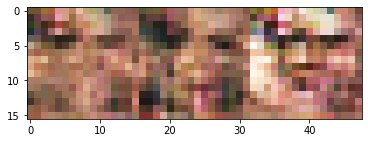

epoch: 00323
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


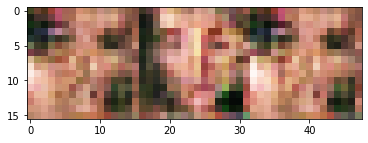

epoch: 00324
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


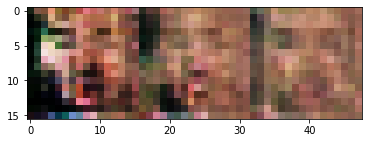

epoch: 00325
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


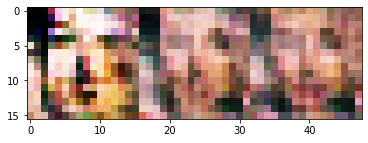

epoch: 00326
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


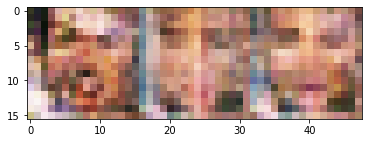

epoch: 00327
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


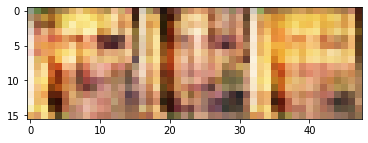

epoch: 00328
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


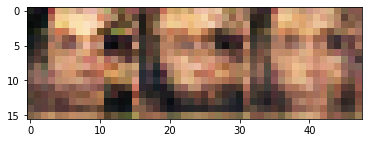

epoch: 00329
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


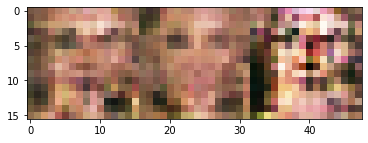

epoch: 00330
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


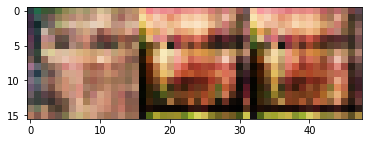

epoch: 00331
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


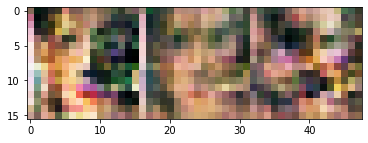

epoch: 00332
p_fake:0.503, p_real:0.501
torch.Size([512, 3, 16, 16])


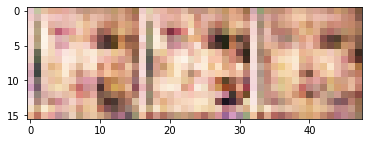

epoch: 00333
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


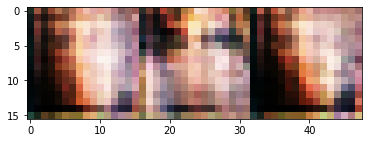

epoch: 00334
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


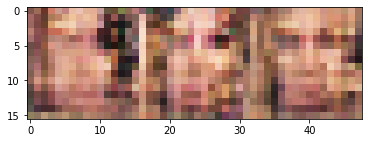

epoch: 00335
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


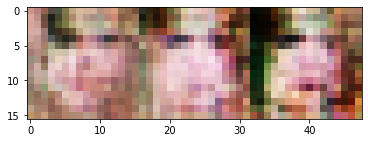

epoch: 00336
p_fake:0.506, p_real:0.506
torch.Size([512, 3, 16, 16])


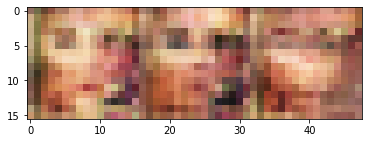

epoch: 00337
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


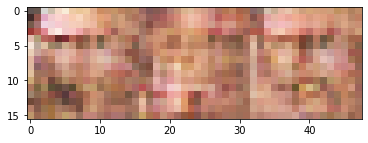

epoch: 00338
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


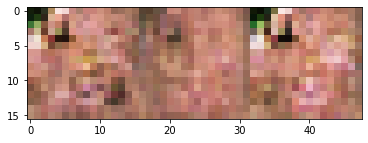

epoch: 00339
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


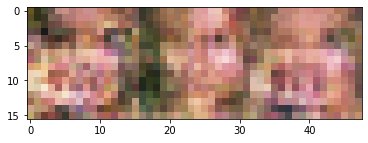

epoch: 00340
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


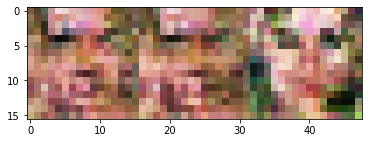

epoch: 00341
p_fake:0.504, p_real:0.502
torch.Size([512, 3, 16, 16])


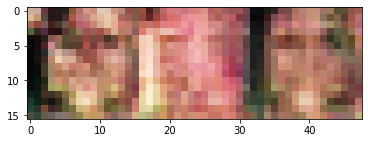

epoch: 00342
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


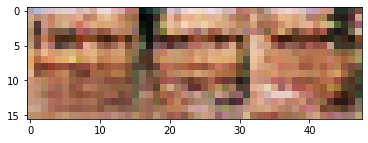

epoch: 00343
p_fake:0.500, p_real:0.498
torch.Size([512, 3, 16, 16])


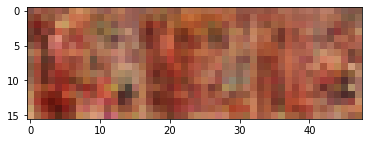

epoch: 00344
p_fake:0.502, p_real:0.501
torch.Size([512, 3, 16, 16])


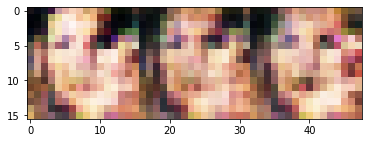

epoch: 00345
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


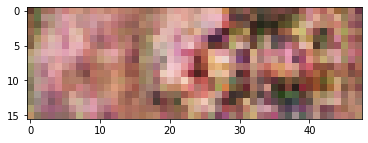

epoch: 00346
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


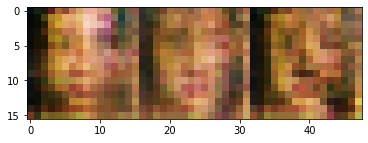

epoch: 00347
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


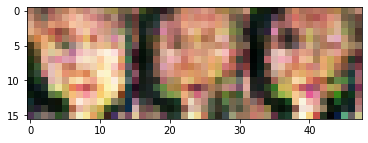

epoch: 00348
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


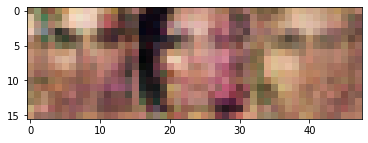

epoch: 00349
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


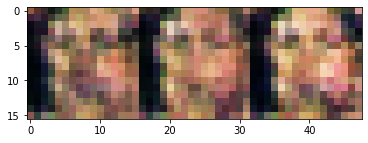

epoch: 00350
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


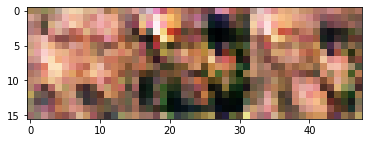

epoch: 00351
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


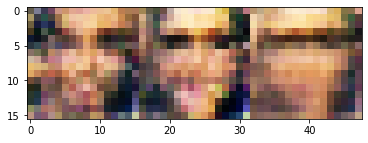

epoch: 00352
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


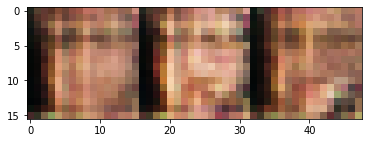

epoch: 00353
p_fake:0.498, p_real:0.498
torch.Size([512, 3, 16, 16])


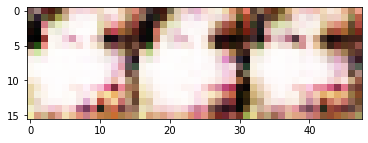

epoch: 00354
p_fake:0.038, p_real:0.988
torch.Size([512, 3, 16, 16])


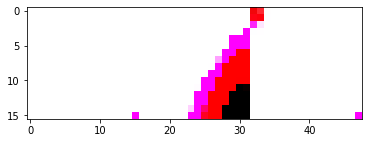

epoch: 00355
p_fake:0.001, p_real:0.997
torch.Size([512, 3, 16, 16])


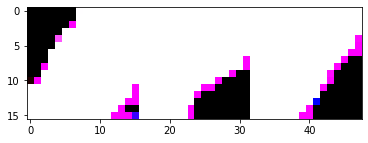

epoch: 00356
p_fake:0.001, p_real:0.999
torch.Size([512, 3, 16, 16])


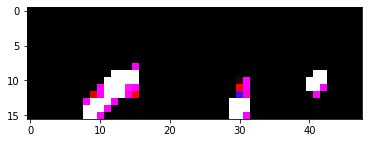

epoch: 00357
p_fake:0.001, p_real:1.000
torch.Size([512, 3, 16, 16])


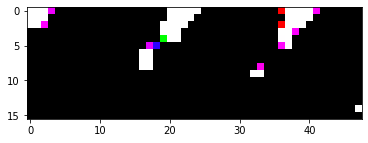

epoch: 00358
p_fake:0.002, p_real:0.999
torch.Size([512, 3, 16, 16])


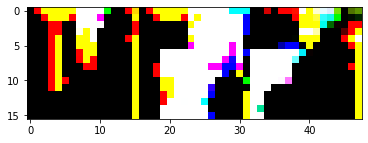

epoch: 00359
p_fake:0.000, p_real:0.998
torch.Size([512, 3, 16, 16])


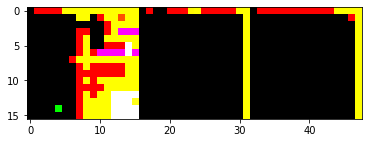

epoch: 00360
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


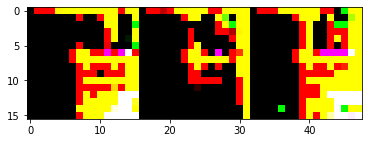

epoch: 00361
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


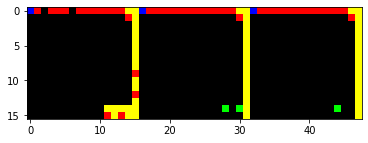

epoch: 00362
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


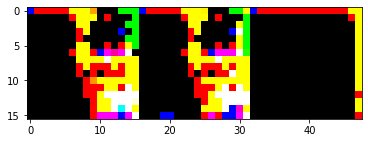

epoch: 00363
p_fake:0.001, p_real:0.999
torch.Size([512, 3, 16, 16])


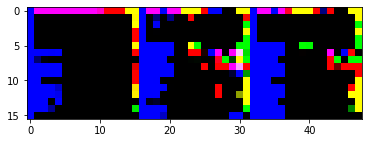

epoch: 00364
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


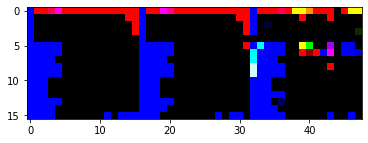

epoch: 00365
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


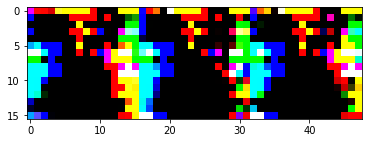

epoch: 00366
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


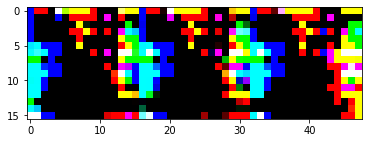

epoch: 00367
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


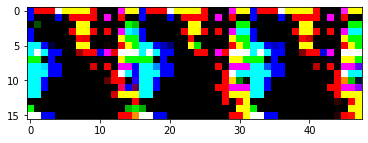

epoch: 00368
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


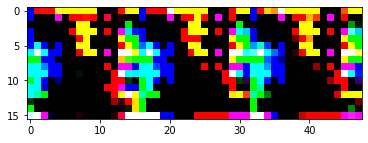

epoch: 00369
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


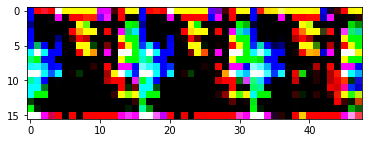

epoch: 00370
p_fake:0.514, p_real:0.658
torch.Size([512, 3, 16, 16])


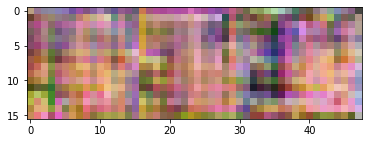

epoch: 00371
p_fake:0.506, p_real:0.676
torch.Size([512, 3, 16, 16])


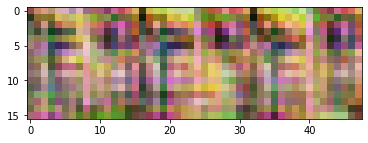

epoch: 00372
p_fake:0.460, p_real:0.565
torch.Size([512, 3, 16, 16])


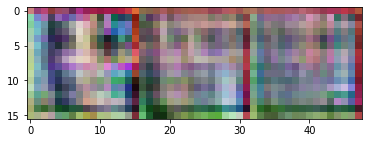

epoch: 00373
p_fake:0.478, p_real:0.578
torch.Size([512, 3, 16, 16])


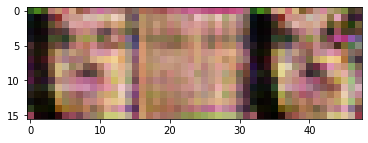

epoch: 00374
p_fake:0.470, p_real:0.537
torch.Size([512, 3, 16, 16])


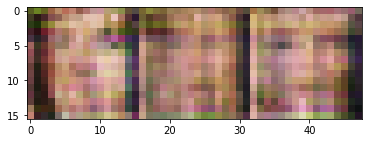

epoch: 00375
p_fake:0.524, p_real:0.531
torch.Size([512, 3, 16, 16])


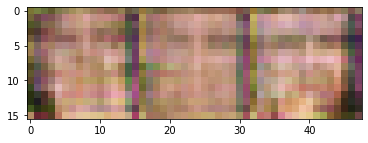

epoch: 00376
p_fake:0.530, p_real:0.507
torch.Size([512, 3, 16, 16])


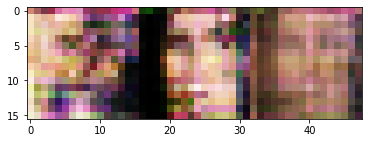

epoch: 00377
p_fake:0.472, p_real:0.512
torch.Size([512, 3, 16, 16])


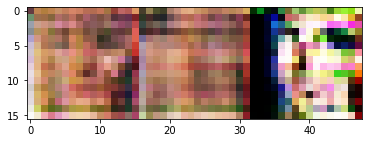

epoch: 00378
p_fake:0.532, p_real:0.540
torch.Size([512, 3, 16, 16])


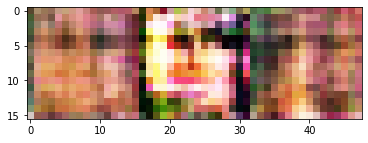

epoch: 00379
p_fake:0.481, p_real:0.508
torch.Size([512, 3, 16, 16])


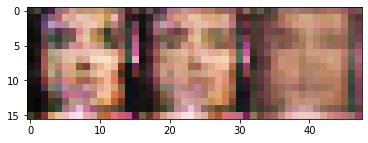

epoch: 00380
p_fake:0.508, p_real:0.497
torch.Size([512, 3, 16, 16])


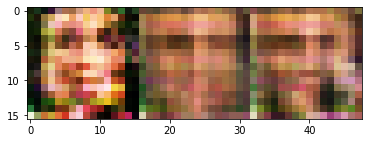

epoch: 00381
p_fake:0.518, p_real:0.485
torch.Size([512, 3, 16, 16])


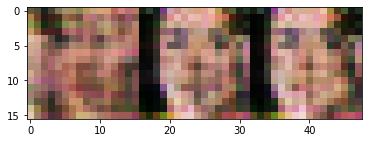

epoch: 00382
p_fake:0.510, p_real:0.496
torch.Size([512, 3, 16, 16])


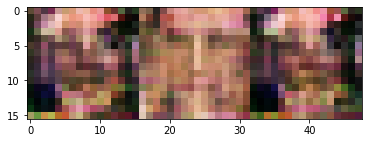

epoch: 00383
p_fake:0.511, p_real:0.511
torch.Size([512, 3, 16, 16])


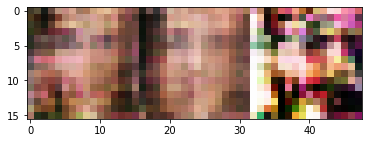

epoch: 00384
p_fake:0.491, p_real:0.496
torch.Size([512, 3, 16, 16])


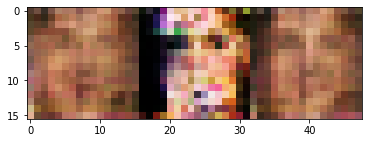

epoch: 00385
p_fake:0.494, p_real:0.491
torch.Size([512, 3, 16, 16])


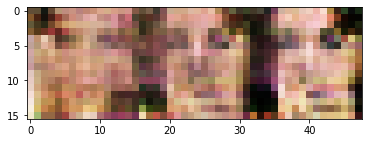

epoch: 00386
p_fake:0.509, p_real:0.509
torch.Size([512, 3, 16, 16])


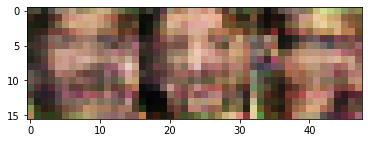

epoch: 00387
p_fake:0.507, p_real:0.504
torch.Size([512, 3, 16, 16])


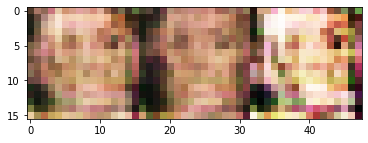

epoch: 00388
p_fake:0.504, p_real:0.513
torch.Size([512, 3, 16, 16])


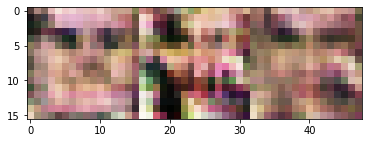

epoch: 00389
p_fake:0.458, p_real:0.460
torch.Size([512, 3, 16, 16])


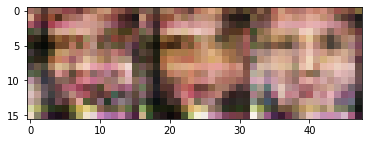

epoch: 00390
p_fake:0.507, p_real:0.506
torch.Size([512, 3, 16, 16])


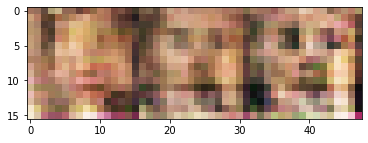

epoch: 00391
p_fake:0.506, p_real:0.526
torch.Size([512, 3, 16, 16])


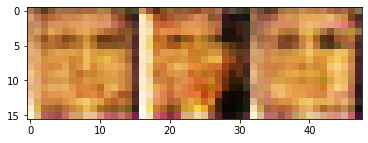

epoch: 00392
p_fake:0.505, p_real:0.499
torch.Size([512, 3, 16, 16])


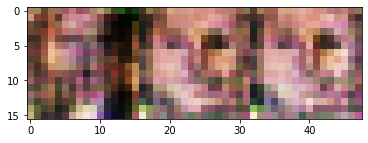

epoch: 00393
p_fake:0.550, p_real:0.537
torch.Size([512, 3, 16, 16])


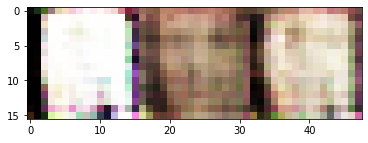

epoch: 00394
p_fake:0.510, p_real:0.485
torch.Size([512, 3, 16, 16])


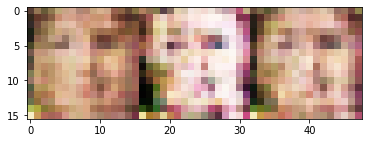

epoch: 00395
p_fake:0.491, p_real:0.509
torch.Size([512, 3, 16, 16])


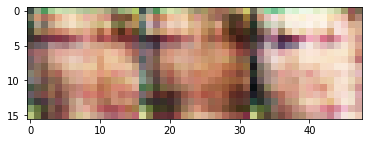

epoch: 00396
p_fake:0.510, p_real:0.498
torch.Size([512, 3, 16, 16])


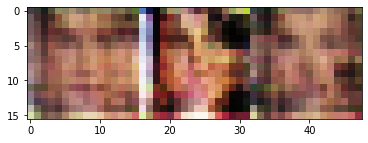

epoch: 00397
p_fake:0.523, p_real:0.528
torch.Size([512, 3, 16, 16])


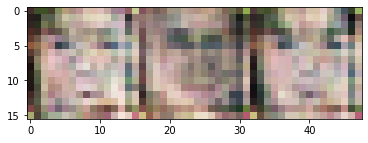

epoch: 00398
p_fake:0.507, p_real:0.497
torch.Size([512, 3, 16, 16])


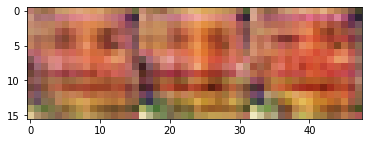

epoch: 00399
p_fake:0.493, p_real:0.495
torch.Size([512, 3, 16, 16])


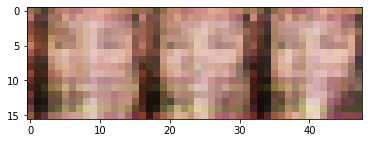

epoch: 00400
p_fake:0.505, p_real:0.496
torch.Size([512, 3, 16, 16])


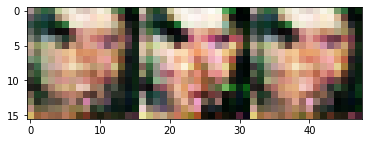

epoch: 00401
p_fake:0.502, p_real:0.499
torch.Size([512, 3, 16, 16])


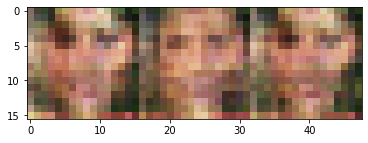

epoch: 00402
p_fake:0.492, p_real:0.498
torch.Size([512, 3, 16, 16])


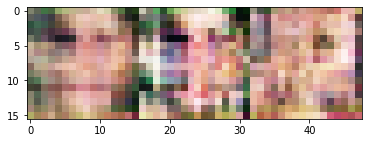

epoch: 00403
p_fake:0.508, p_real:0.504
torch.Size([512, 3, 16, 16])


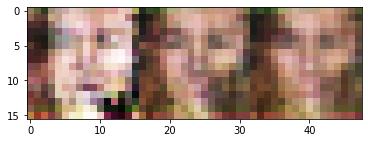

epoch: 00404
p_fake:0.505, p_real:0.504
torch.Size([512, 3, 16, 16])


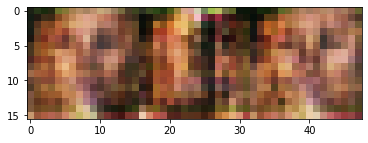

epoch: 00405
p_fake:0.504, p_real:0.502
torch.Size([512, 3, 16, 16])


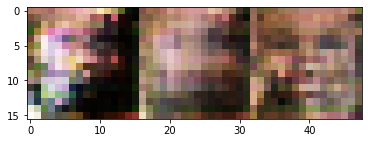

epoch: 00406
p_fake:0.487, p_real:0.516
torch.Size([512, 3, 16, 16])


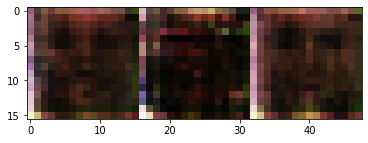

epoch: 00407
p_fake:0.496, p_real:0.500
torch.Size([512, 3, 16, 16])


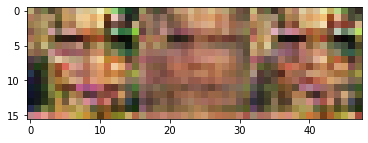

epoch: 00408
p_fake:0.496, p_real:0.498
torch.Size([512, 3, 16, 16])


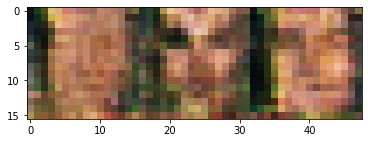

epoch: 00409
p_fake:0.500, p_real:0.496
torch.Size([512, 3, 16, 16])


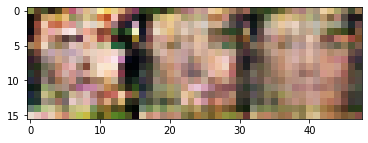

epoch: 00410
p_fake:0.497, p_real:0.497
torch.Size([512, 3, 16, 16])


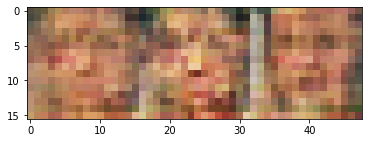

epoch: 00411
p_fake:0.498, p_real:0.504
torch.Size([512, 3, 16, 16])


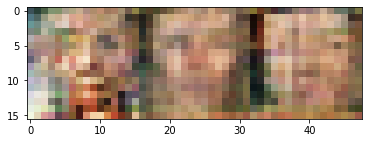

epoch: 00412
p_fake:0.518, p_real:0.510
torch.Size([512, 3, 16, 16])


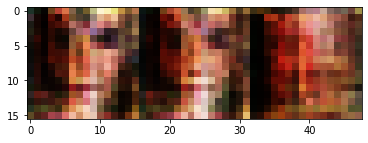

epoch: 00413
p_fake:0.499, p_real:0.494
torch.Size([512, 3, 16, 16])


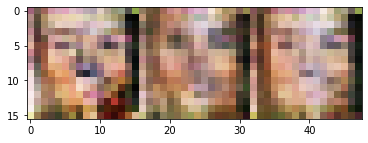

epoch: 00414
p_fake:0.501, p_real:0.498
torch.Size([512, 3, 16, 16])


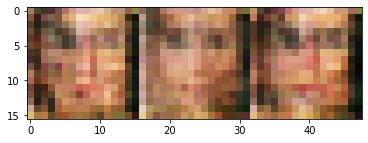

epoch: 00415
p_fake:0.497, p_real:0.496
torch.Size([512, 3, 16, 16])


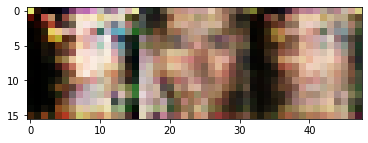

epoch: 00416
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


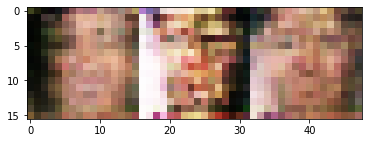

epoch: 00417
p_fake:0.502, p_real:0.500
torch.Size([512, 3, 16, 16])


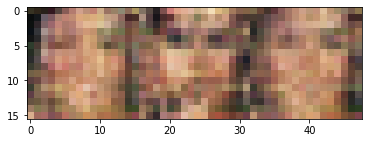

epoch: 00418
p_fake:0.502, p_real:0.504
torch.Size([512, 3, 16, 16])


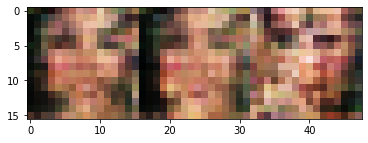

epoch: 00419
p_fake:0.491, p_real:0.499
torch.Size([512, 3, 16, 16])


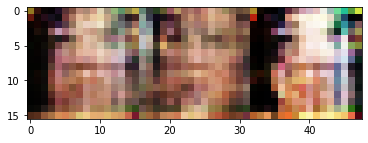

epoch: 00420
p_fake:0.503, p_real:0.500
torch.Size([512, 3, 16, 16])


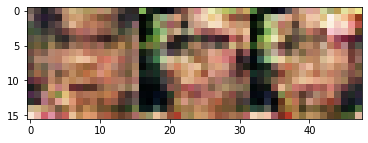

epoch: 00421
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


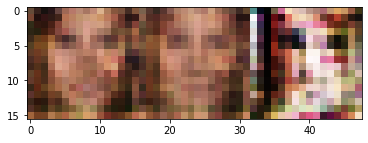

epoch: 00422
p_fake:0.514, p_real:0.500
torch.Size([512, 3, 16, 16])


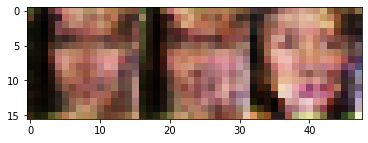

epoch: 00423
p_fake:0.500, p_real:0.497
torch.Size([512, 3, 16, 16])


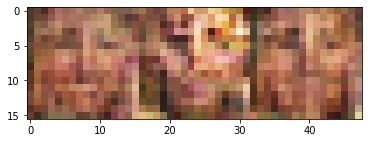

epoch: 00424
p_fake:0.497, p_real:0.496
torch.Size([512, 3, 16, 16])


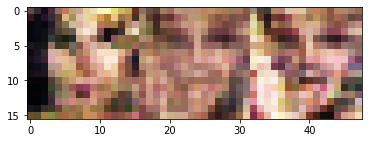

epoch: 00425
p_fake:0.500, p_real:0.501
torch.Size([512, 3, 16, 16])


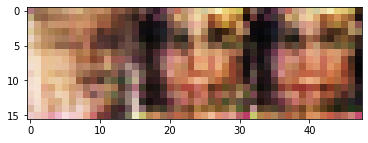

epoch: 00426
p_fake:0.502, p_real:0.500
torch.Size([512, 3, 16, 16])


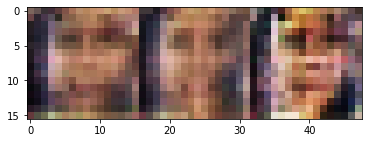

epoch: 00427
p_fake:0.492, p_real:0.492
torch.Size([512, 3, 16, 16])


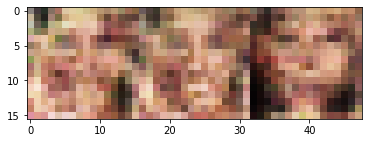

epoch: 00428
p_fake:0.513, p_real:0.505
torch.Size([512, 3, 16, 16])


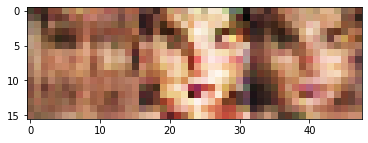

epoch: 00429
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


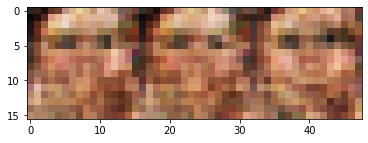

epoch: 00430
p_fake:0.502, p_real:0.502
torch.Size([512, 3, 16, 16])


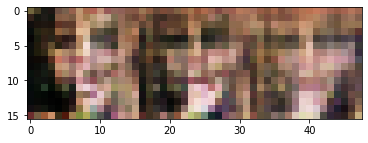

epoch: 00431
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


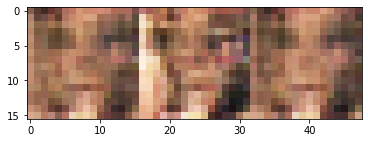

epoch: 00432
p_fake:0.506, p_real:0.502
torch.Size([512, 3, 16, 16])


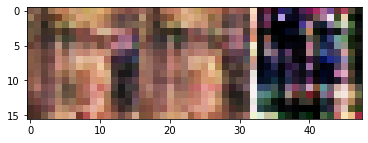

epoch: 00433
p_fake:0.503, p_real:0.500
torch.Size([512, 3, 16, 16])


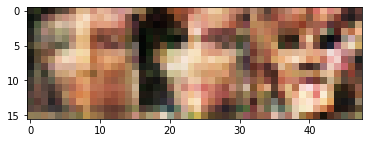

epoch: 00434
p_fake:0.506, p_real:0.501
torch.Size([512, 3, 16, 16])


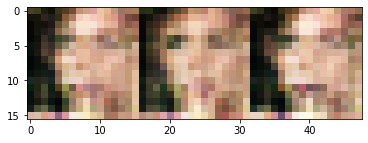

epoch: 00435
p_fake:0.506, p_real:0.508
torch.Size([512, 3, 16, 16])


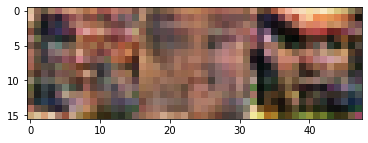

epoch: 00436
p_fake:0.504, p_real:0.504
torch.Size([512, 3, 16, 16])


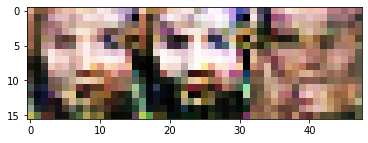

epoch: 00437
p_fake:0.496, p_real:0.496
torch.Size([512, 3, 16, 16])


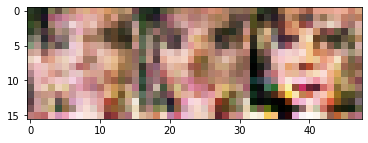

epoch: 00438
p_fake:0.487, p_real:0.494
torch.Size([512, 3, 16, 16])


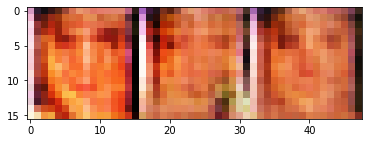

epoch: 00439
p_fake:0.511, p_real:0.504
torch.Size([512, 3, 16, 16])


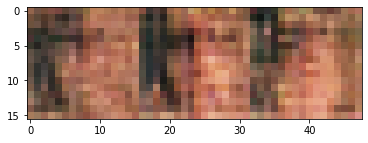

epoch: 00440
p_fake:0.500, p_real:0.500
torch.Size([512, 3, 16, 16])


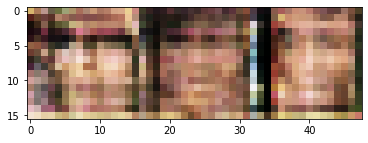

epoch: 00441
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


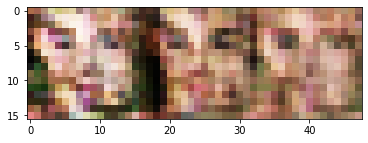

epoch: 00442
p_fake:0.504, p_real:0.501
torch.Size([512, 3, 16, 16])


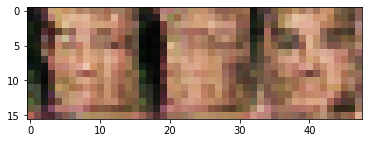

epoch: 00443
p_fake:0.503, p_real:0.500
torch.Size([512, 3, 16, 16])


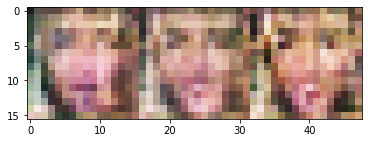

epoch: 00444
p_fake:0.500, p_real:0.499
torch.Size([512, 3, 16, 16])


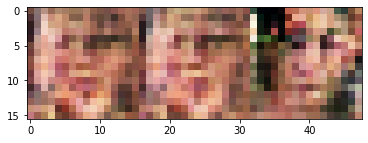

epoch: 00445
p_fake:0.501, p_real:0.499
torch.Size([512, 3, 16, 16])


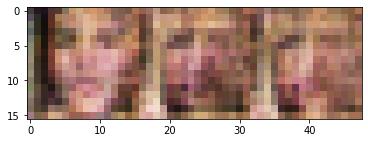

epoch: 00446
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


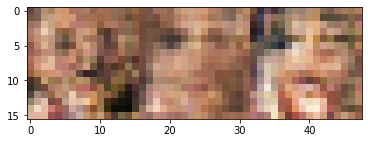

epoch: 00447
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


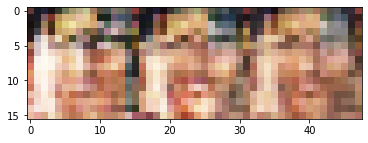

epoch: 00448
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


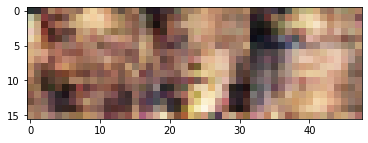

epoch: 00449
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


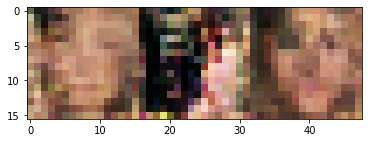

epoch: 00450
p_fake:0.501, p_real:0.501
torch.Size([512, 3, 16, 16])


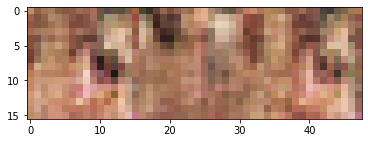

epoch: 00451
p_fake:0.499, p_real:0.498
torch.Size([512, 3, 16, 16])


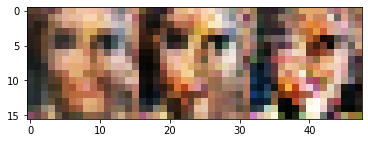

epoch: 00452
p_fake:0.501, p_real:0.502
torch.Size([512, 3, 16, 16])


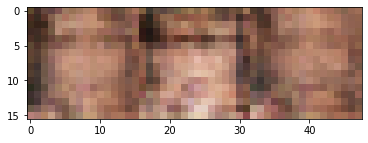

epoch: 00453
p_fake:0.494, p_real:0.496
torch.Size([512, 3, 16, 16])


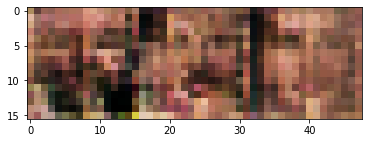

epoch: 00454
p_fake:0.497, p_real:0.495
torch.Size([512, 3, 16, 16])


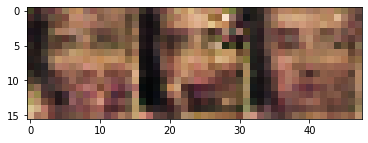

epoch: 00455
p_fake:0.501, p_real:0.500
torch.Size([512, 3, 16, 16])


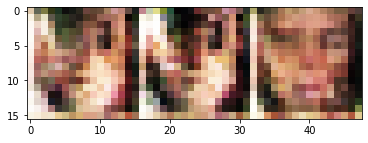

epoch: 00456
p_fake:0.493, p_real:0.494
torch.Size([512, 3, 16, 16])


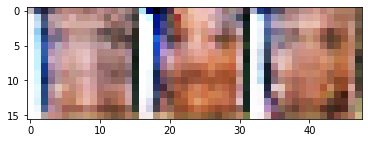

epoch: 00457
p_fake:0.001, p_real:0.959
torch.Size([512, 3, 16, 16])


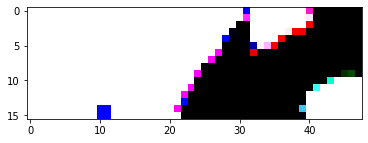

epoch: 00458
p_fake:0.002, p_real:0.998
torch.Size([512, 3, 16, 16])


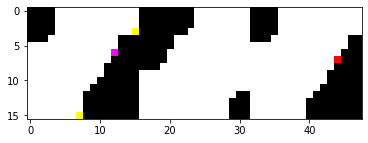

epoch: 00459
p_fake:0.001, p_real:0.999
torch.Size([512, 3, 16, 16])


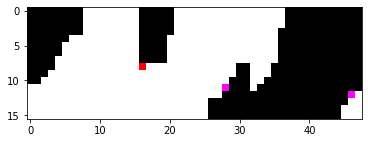

epoch: 00460
p_fake:0.001, p_real:1.000
torch.Size([512, 3, 16, 16])


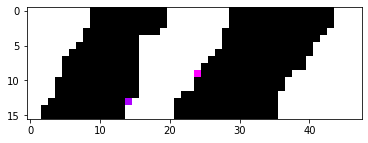

epoch: 00461
p_fake:0.001, p_real:0.998
torch.Size([512, 3, 16, 16])


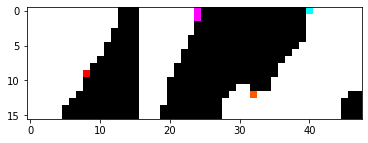

epoch: 00462
p_fake:0.000, p_real:0.999
torch.Size([512, 3, 16, 16])


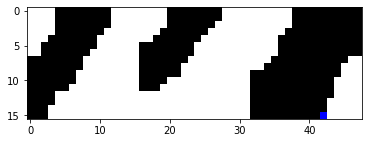

epoch: 00463
p_fake:0.001, p_real:1.000
torch.Size([512, 3, 16, 16])


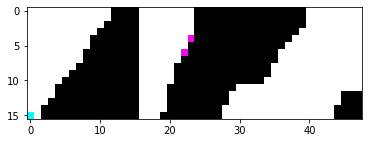

epoch: 00464
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


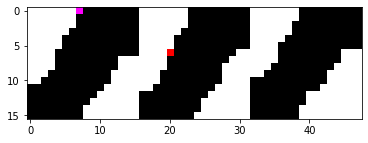

epoch: 00465
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


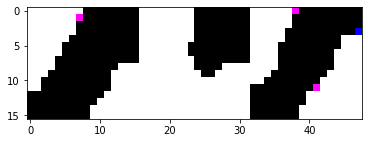

epoch: 00466
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


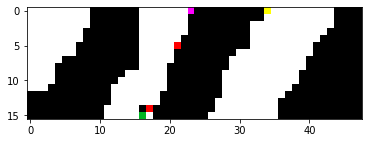

epoch: 00467
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


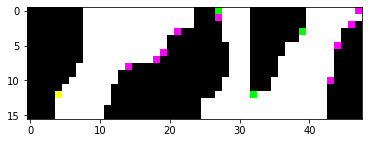

epoch: 00468
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


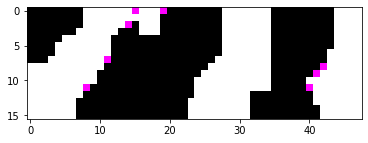

epoch: 00469
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


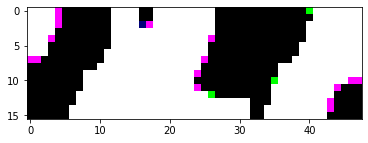

epoch: 00470
p_fake:0.000, p_real:0.999
torch.Size([512, 3, 16, 16])


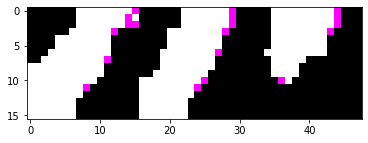

epoch: 00471
p_fake:0.000, p_real:0.999
torch.Size([512, 3, 16, 16])


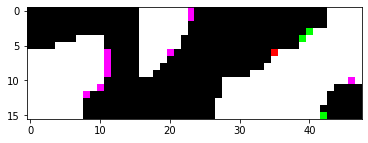

epoch: 00472
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


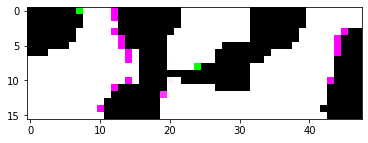

epoch: 00473
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


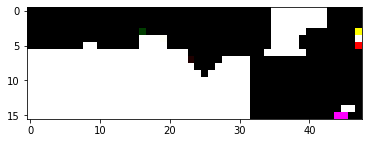

epoch: 00474
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


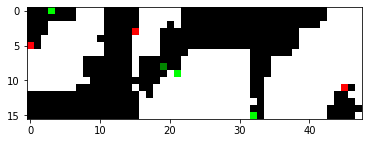

epoch: 00475
p_fake:0.000, p_real:0.999
torch.Size([512, 3, 16, 16])


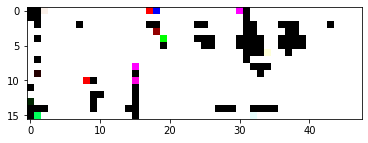

epoch: 00476
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


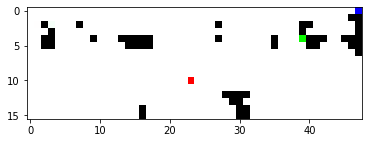

epoch: 00477
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


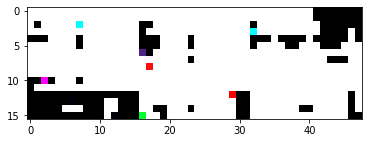

epoch: 00478
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


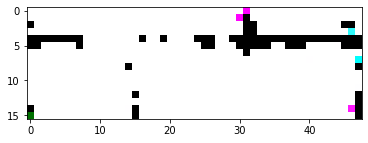

epoch: 00479
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


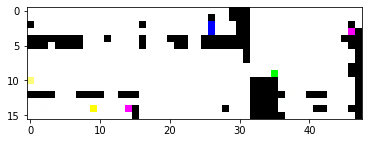

epoch: 00480
p_fake:0.001, p_real:1.000
torch.Size([512, 3, 16, 16])


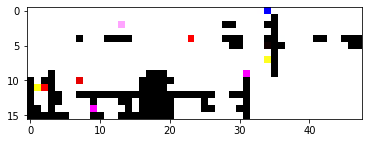

epoch: 00481
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


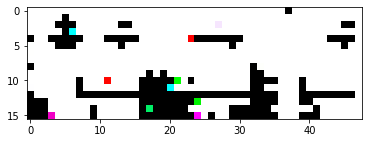

epoch: 00482
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


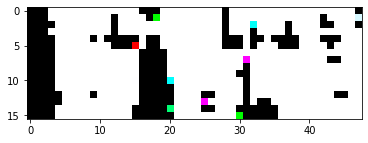

epoch: 00483
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


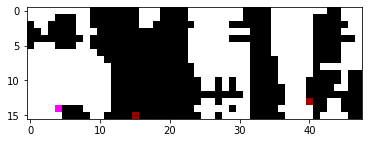

epoch: 00484
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


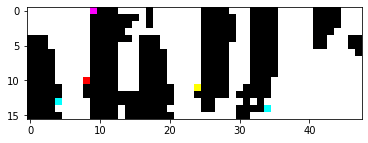

epoch: 00485
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


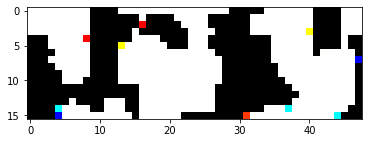

epoch: 00486
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


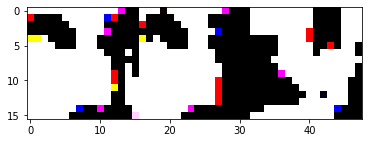

epoch: 00487
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


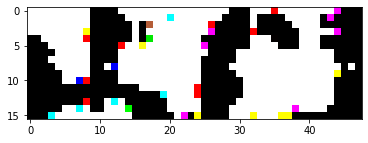

epoch: 00488
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


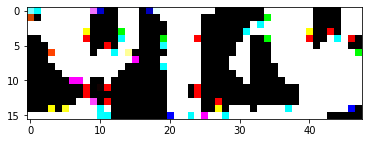

epoch: 00489
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


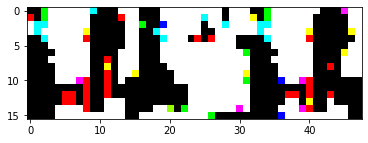

epoch: 00490
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


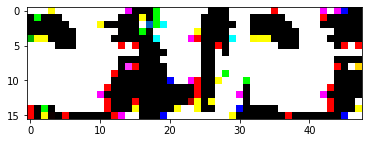

epoch: 00491
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


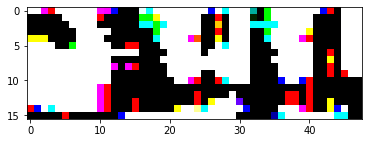

epoch: 00492
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


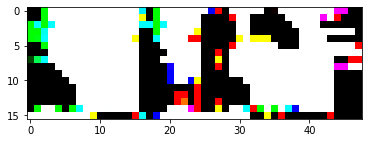

epoch: 00493
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


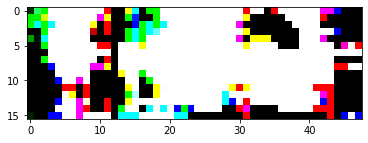

epoch: 00494
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


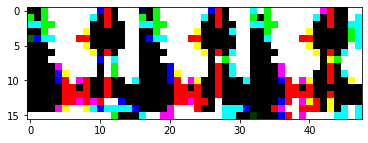

epoch: 00495
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


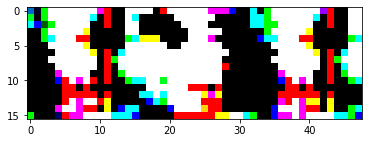

epoch: 00496
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


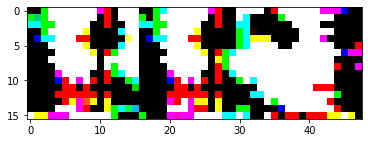

epoch: 00497
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


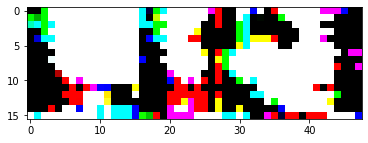

epoch: 00498
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


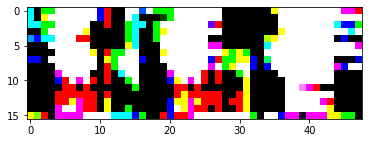

epoch: 00499
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


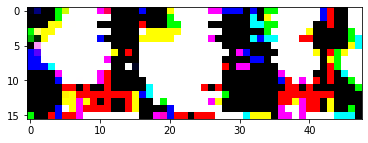

epoch: 00500
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


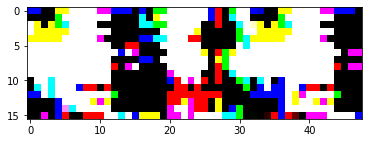

epoch: 00501
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


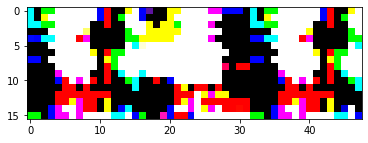

epoch: 00502
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


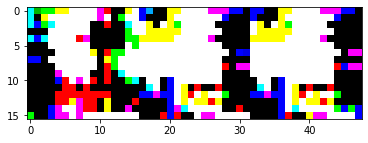

epoch: 00503
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


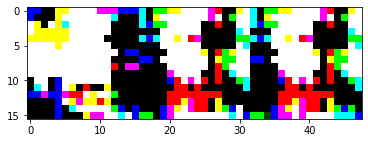

epoch: 00504
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


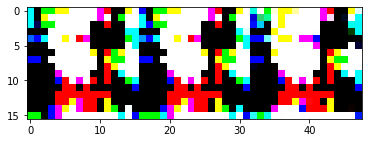

epoch: 00505
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


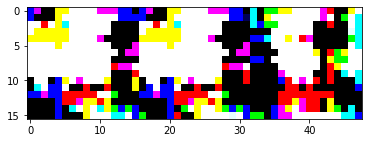

epoch: 00506
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


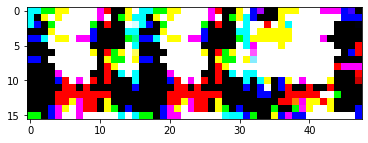

epoch: 00507
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


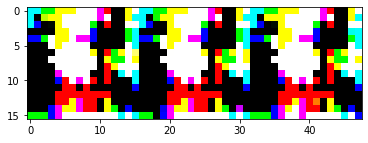

epoch: 00508
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


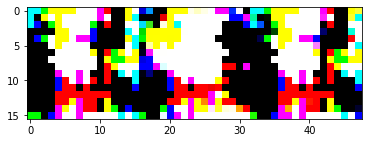

epoch: 00509
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


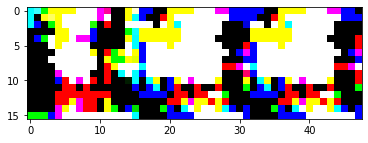

epoch: 00510
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


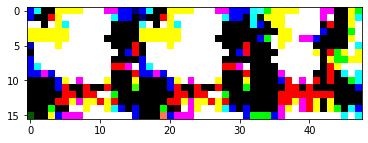

epoch: 00511
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


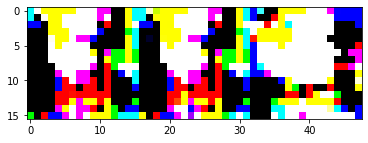

epoch: 00512
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


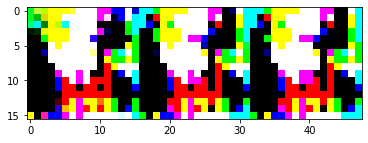

epoch: 00513
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


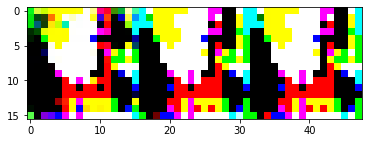

epoch: 00514
p_fake:0.000, p_real:0.999
torch.Size([512, 3, 16, 16])


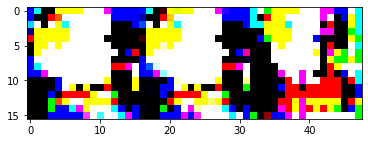

epoch: 00515
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


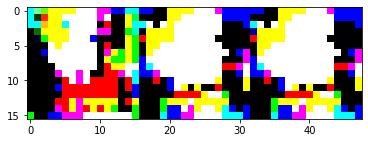

epoch: 00516
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


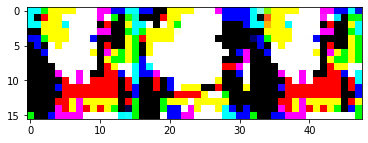

epoch: 00517
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


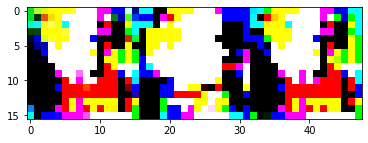

epoch: 00518
p_fake:0.000, p_real:1.000
torch.Size([512, 3, 16, 16])


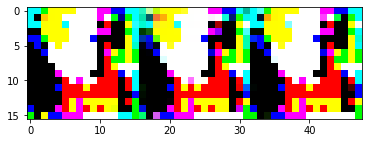

epoch: 00519
p_fake:0.001, p_real:0.999
torch.Size([512, 3, 16, 16])


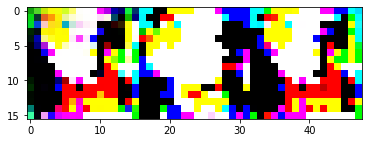

epoch: 00520
p_fake:0.004, p_real:0.996
torch.Size([512, 3, 16, 16])


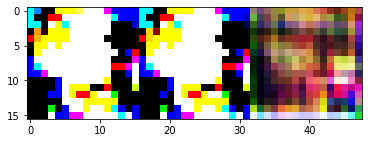

epoch: 00521
p_fake:0.003, p_real:0.999
torch.Size([512, 3, 16, 16])


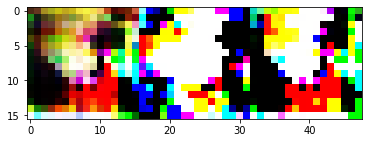

epoch: 00522
p_fake:0.001, p_real:0.999
torch.Size([512, 3, 16, 16])


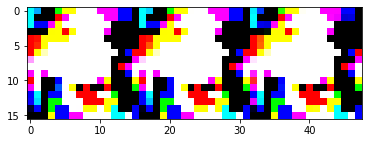

epoch: 00523
p_fake:0.003, p_real:0.996
torch.Size([512, 3, 16, 16])


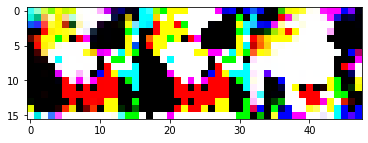

epoch: 00524
p_fake:0.011, p_real:0.997
torch.Size([512, 3, 16, 16])


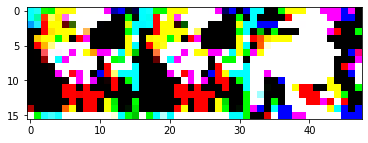

epoch: 00525
p_fake:0.008, p_real:0.998
torch.Size([512, 3, 16, 16])


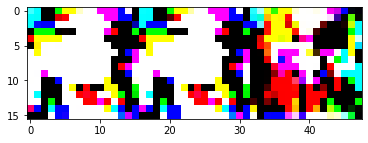

epoch: 00526
p_fake:0.007, p_real:0.989
torch.Size([512, 3, 16, 16])


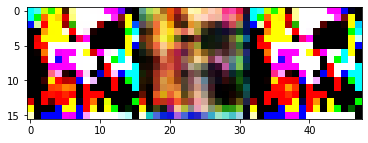

epoch: 00527
p_fake:0.008, p_real:0.954
torch.Size([512, 3, 16, 16])


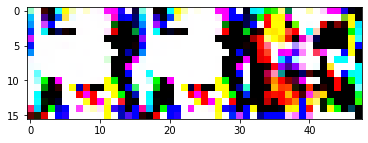

epoch: 00528
p_fake:0.295, p_real:0.950
torch.Size([512, 3, 16, 16])


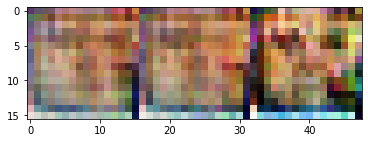

epoch: 00529
p_fake:0.331, p_real:0.811
torch.Size([512, 3, 16, 16])


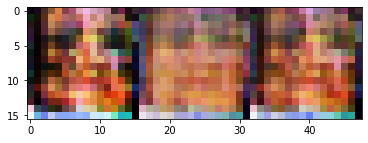

epoch: 00530
p_fake:0.383, p_real:0.661
torch.Size([512, 3, 16, 16])


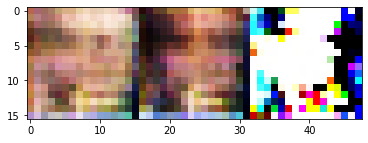

epoch: 00531
p_fake:0.461, p_real:0.757
torch.Size([512, 3, 16, 16])


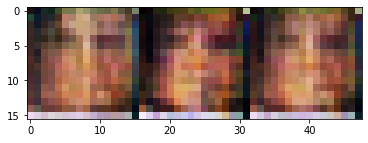

epoch: 00532
p_fake:0.414, p_real:0.667
torch.Size([512, 3, 16, 16])


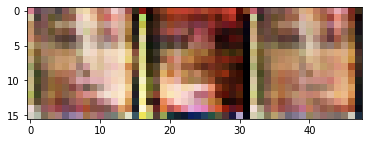

epoch: 00533
p_fake:0.577, p_real:0.595
torch.Size([512, 3, 16, 16])


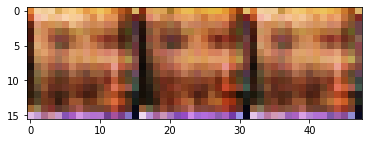

epoch: 00534
p_fake:0.476, p_real:0.536
torch.Size([512, 3, 16, 16])


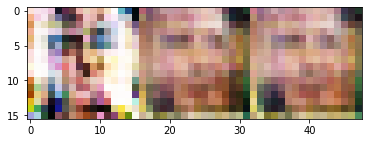

epoch: 00535
p_fake:0.476, p_real:0.546
torch.Size([512, 3, 16, 16])


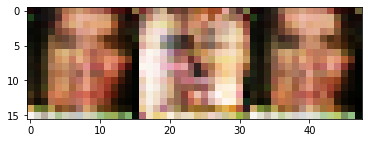

epoch: 00536
p_fake:0.572, p_real:0.523
torch.Size([512, 3, 16, 16])


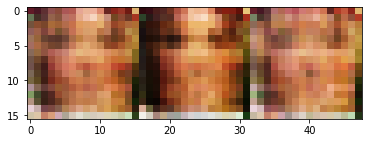

epoch: 00537
p_fake:0.491, p_real:0.531
torch.Size([512, 3, 16, 16])


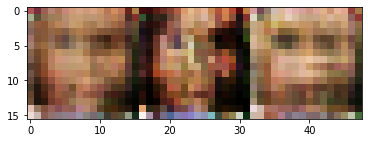

epoch: 00538
p_fake:0.540, p_real:0.616
torch.Size([512, 3, 16, 16])


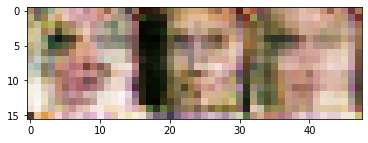

epoch: 00539
p_fake:0.589, p_real:0.577
torch.Size([512, 3, 16, 16])


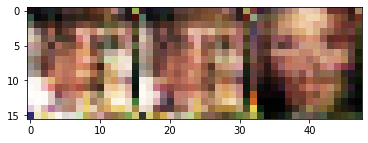

epoch: 00540
p_fake:0.487, p_real:0.539
torch.Size([512, 3, 16, 16])


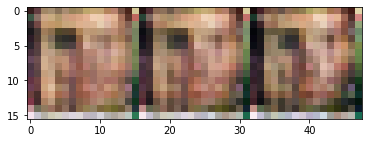

epoch: 00541
p_fake:0.723, p_real:0.614
torch.Size([512, 3, 16, 16])


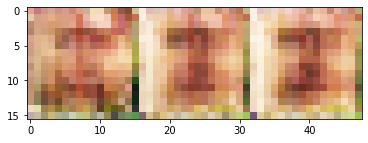

epoch: 00542
p_fake:0.507, p_real:0.488
torch.Size([512, 3, 16, 16])


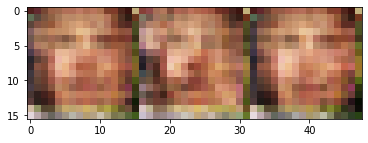

epoch: 00543
p_fake:0.516, p_real:0.531
torch.Size([512, 3, 16, 16])


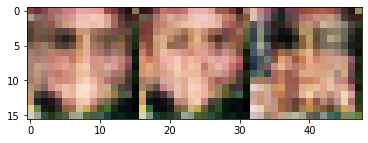

epoch: 00544
p_fake:0.508, p_real:0.512
torch.Size([512, 3, 16, 16])


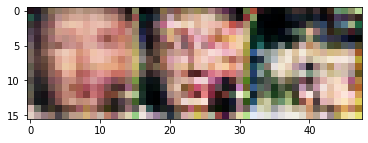

epoch: 00545
p_fake:0.509, p_real:0.515
torch.Size([512, 3, 16, 16])


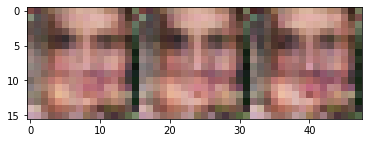

epoch: 00546
p_fake:0.525, p_real:0.510
torch.Size([512, 3, 16, 16])


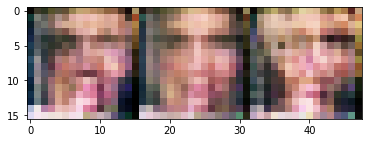

epoch: 00547
p_fake:0.569, p_real:0.503
torch.Size([512, 3, 16, 16])


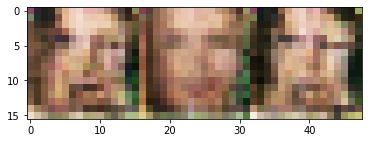

epoch: 00548
p_fake:0.511, p_real:0.494
torch.Size([512, 3, 16, 16])


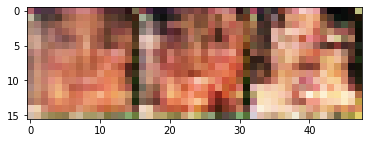

epoch: 00549
p_fake:0.503, p_real:0.480
torch.Size([512, 3, 16, 16])


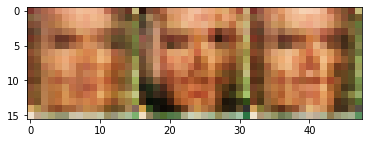

epoch: 00550
p_fake:0.566, p_real:0.507
torch.Size([512, 3, 16, 16])


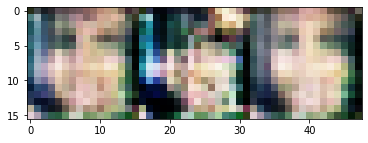

epoch: 00551
p_fake:0.564, p_real:0.539
torch.Size([512, 3, 16, 16])


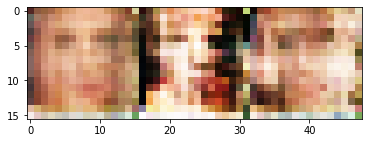

epoch: 00552
p_fake:0.532, p_real:0.508
torch.Size([512, 3, 16, 16])


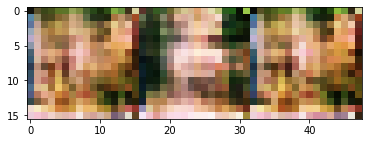

epoch: 00553
p_fake:0.511, p_real:0.497
torch.Size([512, 3, 16, 16])


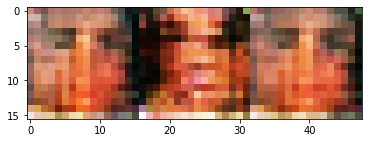

epoch: 00554
p_fake:0.472, p_real:0.476
torch.Size([512, 3, 16, 16])


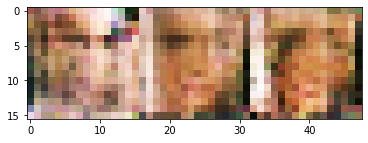

epoch: 00555
p_fake:0.509, p_real:0.486
torch.Size([512, 3, 16, 16])


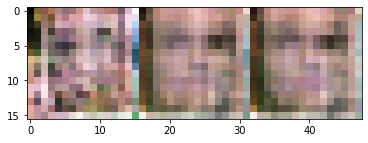

epoch: 00556
p_fake:0.491, p_real:0.489
torch.Size([512, 3, 16, 16])


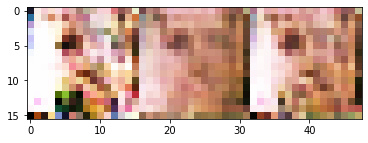

epoch: 00557
p_fake:0.510, p_real:0.480
torch.Size([512, 3, 16, 16])


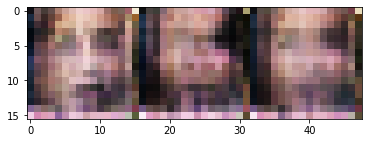

epoch: 00558
p_fake:0.516, p_real:0.517
torch.Size([512, 3, 16, 16])


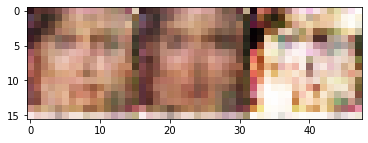

epoch: 00559
p_fake:0.527, p_real:0.518
torch.Size([512, 3, 16, 16])


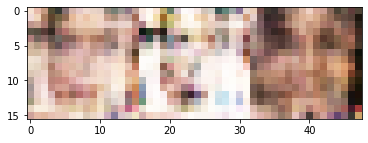

epoch: 00560
p_fake:0.490, p_real:0.469
torch.Size([512, 3, 16, 16])


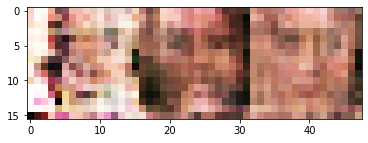

epoch: 00561
p_fake:0.507, p_real:0.497
torch.Size([512, 3, 16, 16])


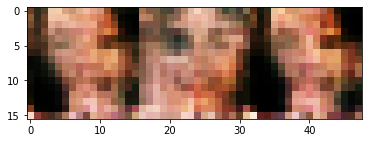

epoch: 00562
p_fake:0.503, p_real:0.497
torch.Size([512, 3, 16, 16])


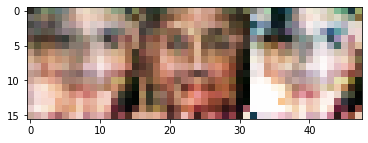

epoch: 00563
p_fake:0.490, p_real:0.484
torch.Size([512, 3, 16, 16])


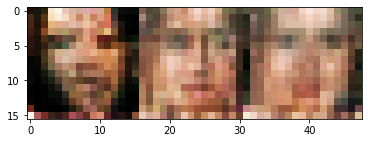

epoch: 00564
p_fake:0.495, p_real:0.488
torch.Size([512, 3, 16, 16])


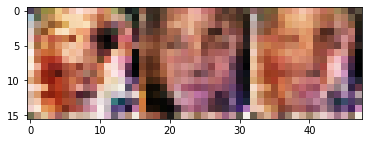

epoch: 00565
p_fake:0.488, p_real:0.471
torch.Size([512, 3, 16, 16])


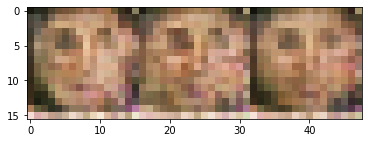

epoch: 00566
p_fake:0.495, p_real:0.458
torch.Size([512, 3, 16, 16])


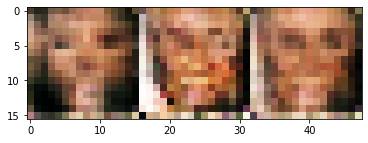

epoch: 00567
p_fake:0.503, p_real:0.600
torch.Size([512, 3, 16, 16])


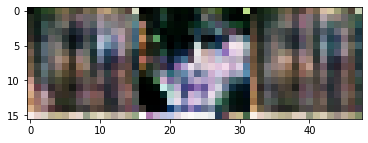

epoch: 00568
p_fake:0.379, p_real:0.401
torch.Size([512, 3, 16, 16])


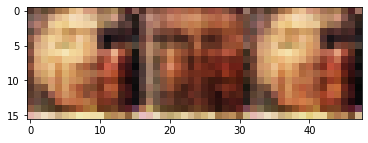

epoch: 00569
p_fake:0.534, p_real:0.512
torch.Size([512, 3, 16, 16])


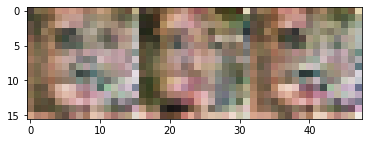

epoch: 00570
p_fake:0.499, p_real:0.489
torch.Size([512, 3, 16, 16])


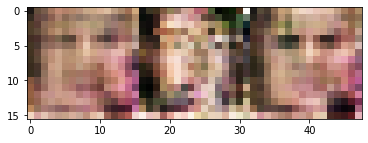

epoch: 00571
p_fake:0.504, p_real:0.485
torch.Size([512, 3, 16, 16])


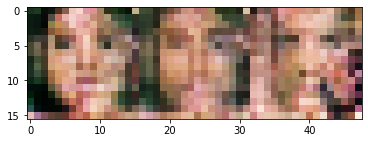

epoch: 00572
p_fake:0.492, p_real:0.455
torch.Size([512, 3, 16, 16])


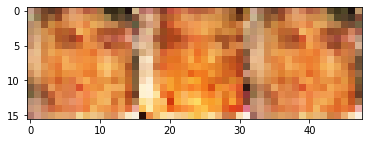

epoch: 00573
p_fake:0.508, p_real:0.503
torch.Size([512, 3, 16, 16])


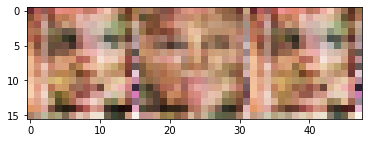

epoch: 00574
p_fake:0.506, p_real:0.501
torch.Size([512, 3, 16, 16])


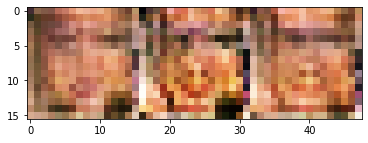

epoch: 00575
p_fake:0.499, p_real:0.501
torch.Size([512, 3, 16, 16])


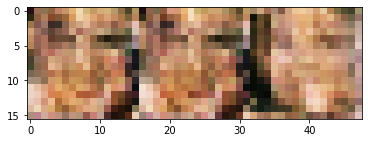

epoch: 00576
p_fake:0.494, p_real:0.486
torch.Size([512, 3, 16, 16])


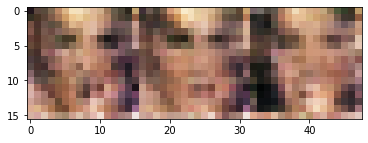

epoch: 00577
p_fake:0.516, p_real:0.499
torch.Size([512, 3, 16, 16])


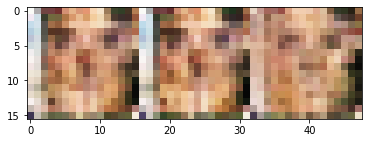

epoch: 00578
p_fake:0.513, p_real:0.498
torch.Size([512, 3, 16, 16])


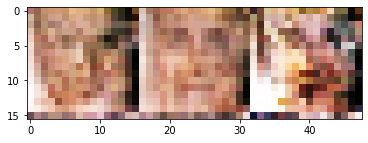

epoch: 00579
p_fake:0.494, p_real:0.407
torch.Size([512, 3, 16, 16])


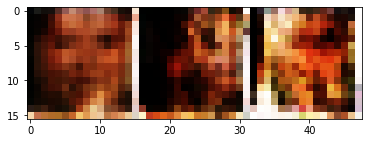

epoch: 00580
p_fake:0.515, p_real:0.513
torch.Size([512, 3, 16, 16])


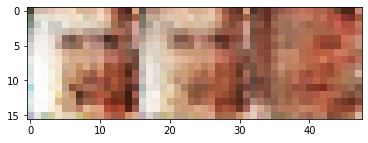

epoch: 00581
p_fake:0.502, p_real:0.491
torch.Size([512, 3, 16, 16])


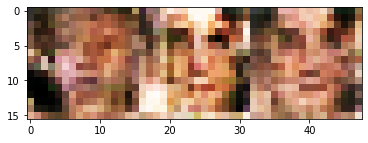

epoch: 00582
p_fake:0.501, p_real:0.498
torch.Size([512, 3, 16, 16])


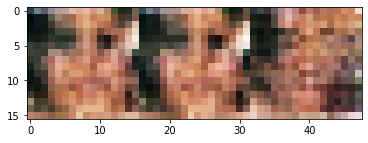

epoch: 00583
p_fake:0.499, p_real:0.499
torch.Size([512, 3, 16, 16])


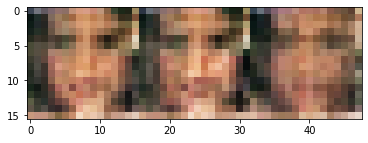

epoch: 00584
p_fake:0.493, p_real:0.488
torch.Size([512, 3, 16, 16])


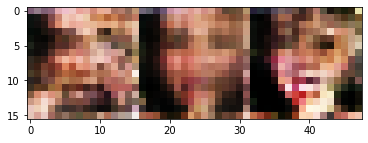

epoch: 00585
p_fake:0.488, p_real:0.489
torch.Size([512, 3, 16, 16])


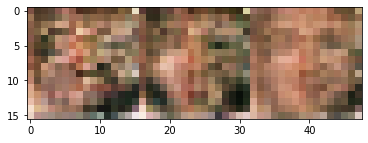

epoch: 00586
p_fake:0.499, p_real:0.490
torch.Size([512, 3, 16, 16])


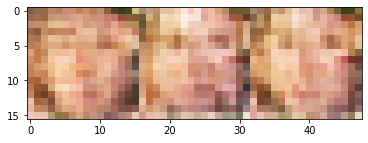

epoch: 00587
p_fake:0.652, p_real:0.679
torch.Size([512, 3, 16, 16])


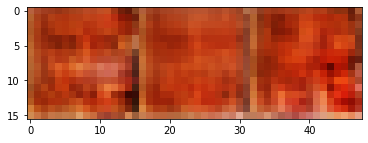

epoch: 00588
p_fake:0.526, p_real:0.501
torch.Size([512, 3, 16, 16])


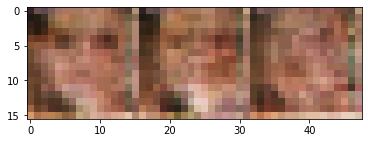

epoch: 00589
p_fake:0.496, p_real:0.505
torch.Size([512, 3, 16, 16])


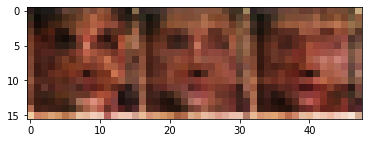

epoch: 00590
p_fake:0.515, p_real:0.503
torch.Size([512, 3, 16, 16])


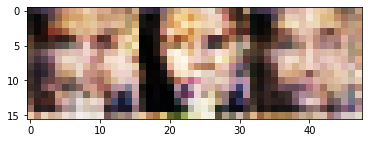

epoch: 00591
p_fake:0.503, p_real:0.505
torch.Size([512, 3, 16, 16])


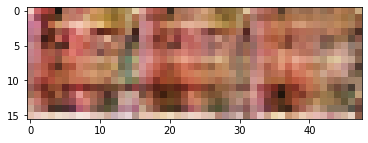

epoch: 00592
p_fake:0.505, p_real:0.489
torch.Size([512, 3, 16, 16])


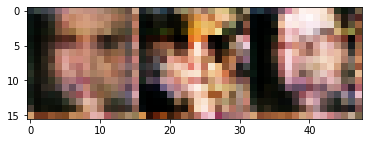

epoch: 00593
p_fake:0.512, p_real:0.507
torch.Size([512, 3, 16, 16])


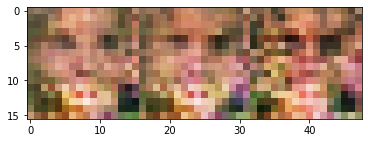

epoch: 00594
p_fake:0.502, p_real:0.498
torch.Size([512, 3, 16, 16])


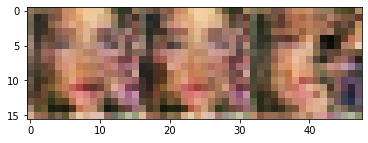

epoch: 00595
p_fake:0.501, p_real:0.497
torch.Size([512, 3, 16, 16])


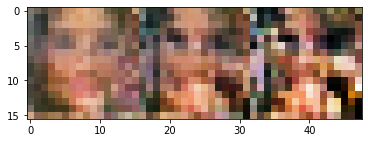

epoch: 00596
p_fake:0.490, p_real:0.489
torch.Size([512, 3, 16, 16])


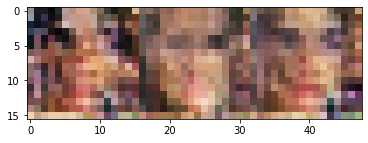

epoch: 00597
p_fake:0.521, p_real:0.513
torch.Size([512, 3, 16, 16])


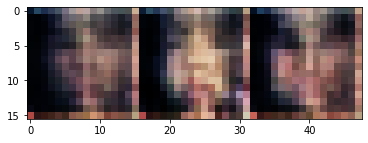

epoch: 00598
p_fake:0.473, p_real:0.468
torch.Size([512, 3, 16, 16])


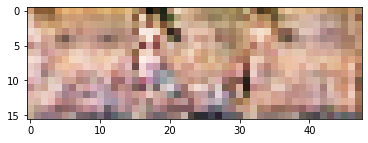

epoch: 00599
p_fake:0.497, p_real:0.499
torch.Size([512, 3, 16, 16])


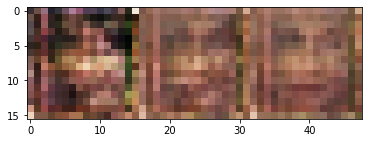

epoch: 00600
p_fake:0.491, p_real:0.492
torch.Size([512, 3, 16, 16])


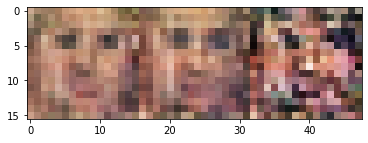

epoch: 00601
p_fake:0.512, p_real:0.497
torch.Size([512, 3, 16, 16])


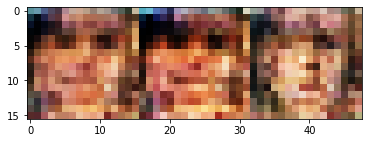

KeyboardInterrupt: ignored

In [77]:
def fix_seed(seed):
    # random
    # random.seed(seed)
    # Numpy
    np.random.seed(seed)
    # Pytorch
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

class ImageDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform
        
    def get_class_label(self, image_name):
        # your method here
        y = ...
        return y
        
    def __getitem__(self, index):
        image_path = self.image_paths[index]
        x = torch.tensor(plt.imread(image_path))/255.0
        if self.transform is not None:
            x = self.transform(x.permute(2, 0, 1))
        return x
    
    def __len__(self):
        return len(self.image_paths)

fix_seed(0)
batch_size = 512

paths = [data_dir+'train'+'/'+fname for fname in os.listdir(data_dir+'train')]
p_depth = 4
transform = tfs.Resize(2**p_depth)
dataset = ImageDataset(paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size,
                        shuffle=True, num_workers=0)



generator = Generator().to(device)
discriminator = Discriminator().to(device)

optimizer_gen = torch.optim.Adam(generator.parameters(), lr=0.001)
optimizer_dis = torch.optim.Adam(discriminator.parameters(), lr=0.0001)


def train_one_epoch(
        turn_steps = {'dis':10, 'gen':10}, 
        max_step = None, 
        is_debug = False, 
        show_interval = 100
        ):
    for i_batch, sample_batched in enumerate(dataloader):

        if i_batch % (turn_steps['dis']+turn_steps['gen']) < turn_steps['dis']:
            step_turn = 'dis'
        else:
            step_turn = 'gen'

        if max_step is not None and i_batch >= max_step:
            break
        if is_debug:
            print(i_batch, sample_batched.size())
            plt.imshow(torch.cat(list(sample_batched.permute(0, 2, 3, 1)[:3]), 1))
            plt.show()
            # input()
        
        generator.train()
        discriminator.train()
        optimizer_gen.zero_grad()
        optimizer_dis.zero_grad()

        image_real = sample_batched.to(device)
        z = torch.randn((batch_size, 64, 1, 1)).to(device)

        image_fake = generator(z)

        # print(image_fake[0])
        # input()
        
        if step_turn == 'dis':

            p_real = discriminator(image_real)
            p_fake = discriminator(image_fake)

            loss_dis_real = - torch.log(p_real).mean()
            loss_dis_fake = - torch.log(1 - p_fake).mean()
            loss_dis = loss_dis_real + loss_dis_fake

            loss_dis.backward()
            optimizer_dis.step()

        elif step_turn == 'gen':

            p_fake = discriminator(image_fake)

            loss_gen = - torch.log(p_fake).mean()
            
            loss_gen.backward()
            optimizer_gen.step()

        if i_batch % show_interval == 0:
            if step_turn == 'dis':
                print(f"p_fake:{p_fake.detach().cpu().mean().item():.3f}, p_real:{p_real.detach().cpu().mean().item():.3f}")
            elif step_turn == 'gen':
                print(f"p_fake:{p_fake.detach().mean().item():.3f}")
            print(image_fake.size())
            plt.imshow(torch.cat(list(image_fake.detach().cpu().permute(0, 2, 3, 1)[:3]), 1))
            plt.show()

for epoch in range(100000):
    print(f"epoch: {epoch:05}")
    train_one_epoch(turn_steps={'dis':10, 'gen':10}, show_interval=1000000)


In [ ]:
config = {
    'batchsize': 2,
    'num_workers':4,
    'image_size': 64,
}